In [1]:
#importing required libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
#function to read csv or excel file
def read_file(file_name):
    try:
        if file_name.endswith('.csv'):
            return pd.read_csv(file_name)
        elif file_name.endswith('.xlsx'):
            return pd.read_excel(file_name)
        else:
            print('File format not supported')
            return None
    except:
        print('File not found')
        return None

In [3]:
#total missing data function
def nun_missing_values(df):
    total_missing = df.isnull().sum()
    total_missing = total_missing[total_missing > 0]
    total_missing.sort_values(inplace=True)
    return total_missing

In [4]:
#returning the dataframe with the nun columns dropped
def drop_columns_40_percent_missing(df):
    nun_columns = df.isnull().sum()
    nun_columns = nun_columns[nun_columns > len(df) * 0.4]
    nun_columns.sort_values(inplace=True)
    df.drop(nun_columns.index, axis=1, inplace=True)
    print('\nDropped columns with more than 40% missing values: {}'.format(nun_columns.sum()))
    return df

In [5]:
def bool_to_datetime(df):
    try:
        if 'Date' in df.columns:
            df['Date'] = pd.to_datetime(df['Date'])
        elif 'date' in df.columns:
            df['date'] = pd.to_datetime(df['date'])
        return df
    except:
        print('Date column not found')
        return None

In [6]:
#extract year from the date column
def extract_year(df):
    try:
        if 'Date' in df.columns:
            df['year'] = df['Date'].dt.year
        elif 'date' in df.columns:
            df['year'] = df['date'].dt.year
        return df['year']
    except:
        print('Date column not found')
        return None

In [7]:
#extract month from the date column
def extract_month(df):
    try:
        if 'Date' in df.columns:
            df['month'] = df['Date'].dt.month
        elif 'date' in df.columns:
            df['month'] = df['date'].dt.month
        return df['month']
    except:
        print('Date column not found')
        return None

In [8]:
#spliting year into quarters by month and adding quarter column
def split_month_into_quarters(df):
    try:
        df['quarter'] = df['month'].apply(lambda x: 1 if x <= 3 else (2 if x <= 6 else (3 if x <= 9 else 4)))
        return df['quarter']
    except:
        print('month column not found')
        return None


In [9]:
#function for extracting the numerical features
def numeric_features(df):
    numeric_features = df.select_dtypes(include=['int64', 'float64']).columns
    return numeric_features

In [10]:
#function for extracting the categorical features
def categorical_features(df):
    categorical_features = df.select_dtypes(include=['object', 'bool', 'category']).columns
    return categorical_features

In [11]:
#function for dropping id column
def drop_id(df):
    try:
        if 'id' in df.columns:
            df.drop('id', axis=1, inplace=True)
        elif 'ID' in df.columns:
            df.drop('ID', axis=1, inplace=True)
        return df
    except:
        print('ID column not found')
        return None

In [12]:
#function to get information about the data
def df_info(df):
    print('Dataframe info:')
    print(df.info())
    print('\n')
    print('Dataframe describe:')
    print(df.describe())

In [13]:
#automatic exploratory data analysis for each dataframe
def auto_explore(df):
    '''
    This function will automatically explore the dataframe
    '''
    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram
    ax[0].hist(df)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=df.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=df.median(), color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=df.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Plot the boxplot
    ax[1].boxplot(df, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Distribution of ' + df.name)

    # Show the figure
    fig.show()

In [14]:
data = '../input/data-police-shootings/fatal-police-shootings-data.csv'
df = read_file(data)

In [15]:
df_info(df)

Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416 entries, 0 to 5415
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5416 non-null   int64  
 1   name                     5416 non-null   object 
 2   date                     5416 non-null   object 
 3   manner_of_death          5416 non-null   object 
 4   armed                    5189 non-null   object 
 5   age                      5181 non-null   float64
 6   gender                   5414 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     5416 non-null   object 
 9   state                    5416 non-null   object 
 10  signs_of_mental_illness  5416 non-null   bool   
 11  threat_level             5416 non-null   object 
 12  flee                     5167 non-null   object 
 13  body_camera              5416 non-null   bool   
dtypes: bool(

In [16]:
#converting the date column to datetime
bool_to_datetime(df)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,5921,William Slyter,2020-06-13,shot,gun,22.0,M,W,Kansas City,MO,False,other,Other,False
5412,5922,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False
5413,5924,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,W,Lawrence,KS,False,attack,Car,False
5414,5926,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False


In [17]:
#extracting year from the date column and adding it to the dataframe
df['year'] = extract_year(df)
df['year'] = df.year.astype('category')

In [18]:
#extracting month from the date column and adding it to the dataframe
df['month'] = extract_month(df)
df['month'] = df.month.astype('category')

In [19]:
#adding quarter column to the dataframe
df['quarter'] = split_month_into_quarters(df)
df['quarter'] = df.quarter.astype('category')

In [20]:
df = drop_id(df)

In [21]:
#deinializing race column
df.replace(to_replace = ['A'], value = ['Asian'], inplace = True)
df.replace(to_replace = ['B'], value = ['Black Non-Hispanic'], inplace = True)
df.replace(to_replace = ['H'], value = ['Hispanic'], inplace = True)
df.replace(to_replace = ['N'], value = ['Native American'], inplace = True)
df.replace(to_replace = ['O'], value = ['Other'], inplace = True)
df.replace(to_replace = ['W'], value = ['White Non-Hispanic'], inplace = True)

In [22]:
df_info(df)

Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416 entries, 0 to 5415
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   name                     5416 non-null   object        
 1   date                     5416 non-null   datetime64[ns]
 2   manner_of_death          5416 non-null   object        
 3   armed                    5189 non-null   object        
 4   age                      5181 non-null   float64       
 5   gender                   5414 non-null   object        
 6   race                     4895 non-null   object        
 7   city                     5416 non-null   object        
 8   state                    5416 non-null   object        
 9   signs_of_mental_illness  5416 non-null   bool          
 10  threat_level             5416 non-null   object        
 11  flee                     5167 non-null   object        
 12  body_camera       

In [23]:
nun_missing_values(df)

gender      2
armed     227
age       235
flee      249
race      521
dtype: int64

In [24]:
#dropping columns with more than 40% missing values
drop_columns_40_percent_missing(df)


Dropped columns with more than 40% missing values: 0


,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year,month,quarter
0,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,2015,1,1
1,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White Non-Hispanic,Aloha,OR,False,attack,Not fleeing,False,2015,1,1
2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,2015,1,1
3,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White Non-Hispanic,San Francisco,CA,True,attack,Not fleeing,False,2015,1,1
4,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,2015,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5411,William Slyter,2020-06-13,shot,gun,22.0,M,White Non-Hispanic,Kansas City,MO,False,other,Other,False,2020,6,2
5412,TK TK,2020-06-13,shot,undetermined,NaN,M,NaN,San Bernardino,CA,False,attack,Not fleeing,False,2020,6,2
5413,Nicholas Hirsh,2020-06-15,shot,gun,31.0,M,White Non-Hispanic,Lawrence,KS,False,attack,Car,False,2020,6,2
5414,TK TK,2020-06-16,shot,gun,24.0,M,NaN,Beach Park,IL,False,attack,Not fleeing,False,2020,6,2


In [25]:
#getting the numeric features
numeric_features = numeric_features(df)

#getting the categorical features
categorical_features = categorical_features(df)

<AxesSubplot:>

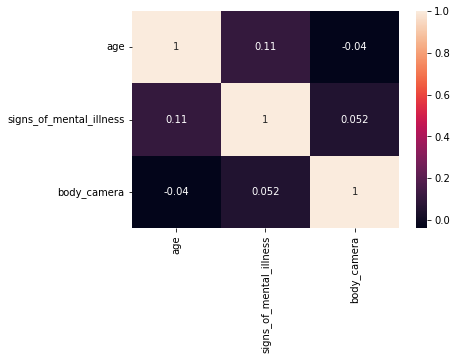

In [26]:
#dataframe correlation
corr = df.corr()
sns.heatmap(corr, annot=True)

In [27]:
#getting distribution of numeric features
for col_name in numeric_features:
    col = df[col_name]
    rng = col.max() - col.min()
    var = col.var()
    std = col.std()
    print('\n{}:\n - Range: {:.2f}\n - Variance: {:.2f}\n - Std.Dev: {:.2f}'.format(col_name, rng, var, std))


age:
 - Range: 85.00
 - Variance: 172.03
 - Std.Dev: 13.12


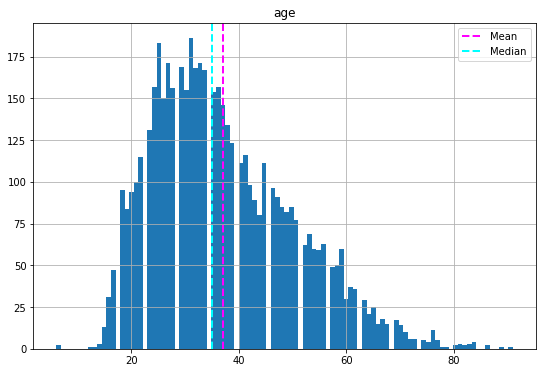

In [28]:
#getting distribution of numeric features with plots

for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2, label='Mean')
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2, label='Median')
    ax.set_title(col)
    plt.legend()
plt.show()



Statistical analysis of name:
TK TK                       187
Michael Johnson               3
Michael Ferguson              2
Timothy Leroy Harrington      2
Robert Edwards                2
                           ... 
Kheyanev Littledog            1
Maurico Barron                1
Dennis Hunt                   1
Luis Michael Hoff             1
Nicholas Hirsh                1
Name: name, Length: 5206, dtype: int64


Descriptive statistics of name:
count      5416
unique     5206
top       TK TK
freq        187
Name: name, dtype: object


Histogram of name:


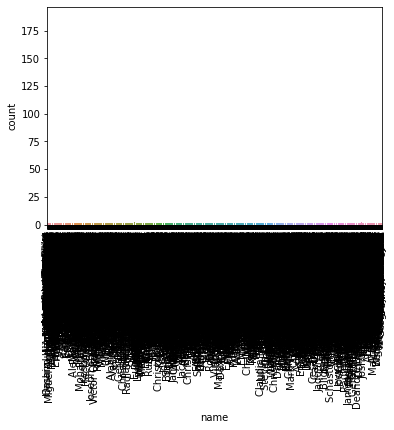



Statistical analysis of manner_of_death:
shot                5146
shot and Tasered     270
Name: manner_of_death, dtype: int64


Descriptive statistics of manner_of_death:
count     5416
unique       2
top       shot
freq      5146
Name: manner_of_death, dtype: object


Histogram of manner_of_death:


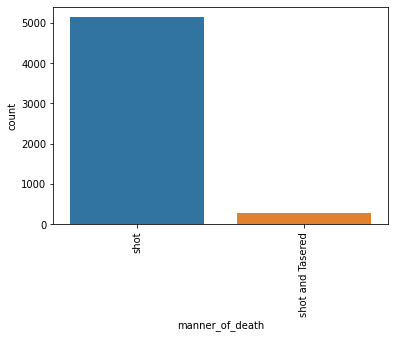



Statistical analysis of armed:
gun                        3060
knife                       792
unarmed                     353
toy weapon                  186
undetermined                164
                           ... 
baseball bat and bottle       1
fireworks                     1
pen                           1
chainsaw                      1
car, knife and mace           1
Name: armed, Length: 93, dtype: int64


Descriptive statistics of armed:
count     5189
unique      93
top        gun
freq      3060
Name: armed, dtype: object


Histogram of armed:


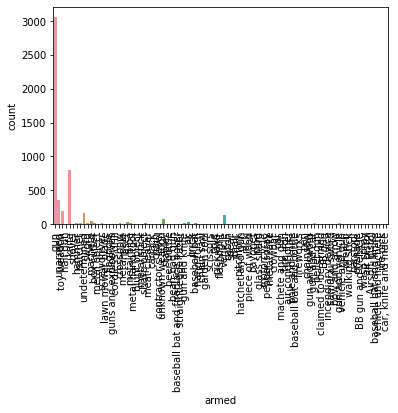



Statistical analysis of gender:
M    5176
F     238
Name: gender, dtype: int64


Descriptive statistics of gender:
count     5414
unique       2
top          M
freq      5176
Name: gender, dtype: object


Histogram of gender:


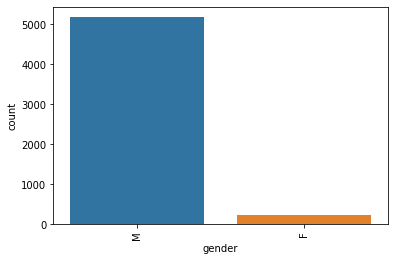



Statistical analysis of race:
White Non-Hispanic    2476
Black Non-Hispanic    1298
Hispanic               902
Asian                   93
Native American         78
Other                   48
Name: race, dtype: int64


Descriptive statistics of race:
count                   4895
unique                     6
top       White Non-Hispanic
freq                    2476
Name: race, dtype: object


Histogram of race:


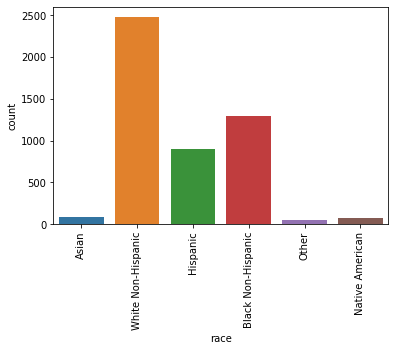



Statistical analysis of city:
Los Angeles          85
Phoenix              78
Houston              57
Las Vegas            45
San Antonio          43
                     ..
Huntingdon County     1
Loxahatchee           1
Chestertown           1
Campbellton           1
Beach Park            1
Name: city, Length: 2470, dtype: int64


Descriptive statistics of city:
count            5416
unique           2470
top       Los Angeles
freq               85
Name: city, dtype: object


Histogram of city:


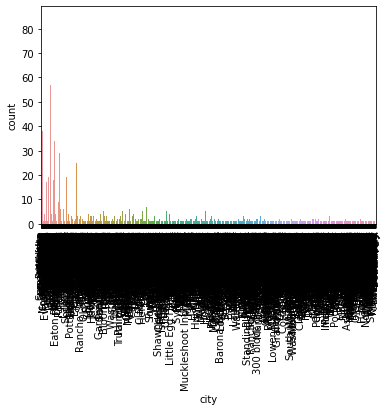



Statistical analysis of state:
CA    799
TX    481
FL    350
AZ    254
CO    195
GA    182
OK    164
NC    156
OH    155
WA    152
MO    141
TN    139
LA    109
PA    108
NM    106
IL    104
AL    104
NY    101
NV     96
KY     95
IN     95
VA     95
WI     91
OR     88
SC     88
AR     83
MD     79
MI     78
NJ     68
MS     65
MN     61
UT     60
WV     54
KS     50
ID     42
AK     39
MA     35
IA     32
MT     31
HI     30
NE     24
ME     22
CT     21
SD     17
WY     14
NH     13
DC     13
DE     13
ND     11
VT      9
RI      4
Name: state, dtype: int64


Descriptive statistics of state:
count     5416
unique      51
top         CA
freq       799
Name: state, dtype: object


Histogram of state:


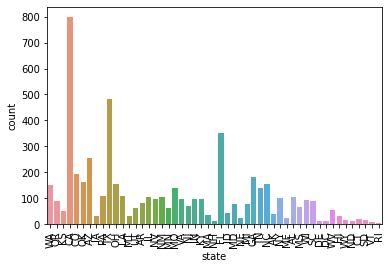



Statistical analysis of signs_of_mental_illness:
False    4200
True     1216
Name: signs_of_mental_illness, dtype: int64


Descriptive statistics of signs_of_mental_illness:
count      5416
unique        2
top       False
freq       4200
Name: signs_of_mental_illness, dtype: object


Histogram of signs_of_mental_illness:


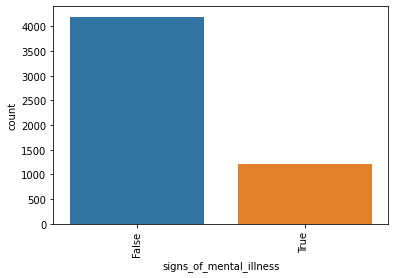



Statistical analysis of threat_level:
attack          3495
other           1682
undetermined     239
Name: threat_level, dtype: int64


Descriptive statistics of threat_level:
count       5416
unique         3
top       attack
freq        3495
Name: threat_level, dtype: object


Histogram of threat_level:


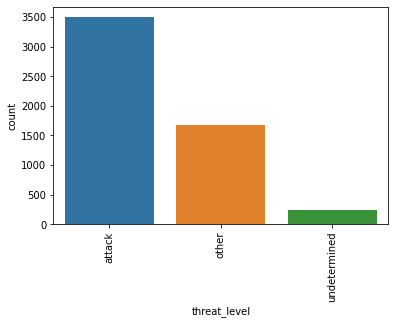



Statistical analysis of flee:
Not fleeing    3411
Car             900
Foot            692
Other           164
Name: flee, dtype: int64


Descriptive statistics of flee:
count            5167
unique              4
top       Not fleeing
freq             3411
Name: flee, dtype: object


Histogram of flee:


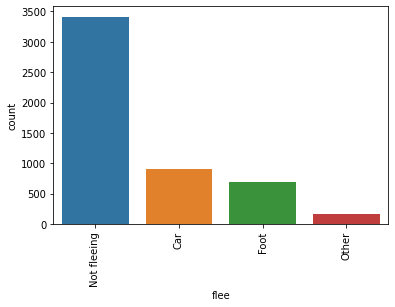



Statistical analysis of body_camera:
False    4798
True      618
Name: body_camera, dtype: int64


Descriptive statistics of body_camera:
count      5416
unique        2
top       False
freq       4798
Name: body_camera, dtype: object


Histogram of body_camera:


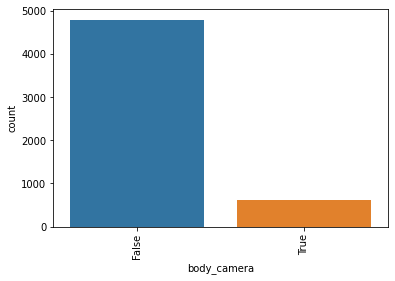



Statistical analysis of year:
2019    1002
2015     994
2018     991
2017     986
2016     962
2020     481
Name: year, dtype: int64


Descriptive statistics of year:
count     5416
unique       6
top       2019
freq      1002
Name: year, dtype: int64


Histogram of year:


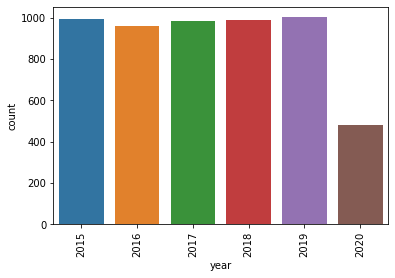



Statistical analysis of month:
3     551
1     531
2     495
5     486
4     470
6     439
7     439
12    421
8     418
10    411
11    392
9     363
Name: month, dtype: int64


Descriptive statistics of month:
count     5416
unique      12
top          3
freq       551
Name: month, dtype: int64


Histogram of month:


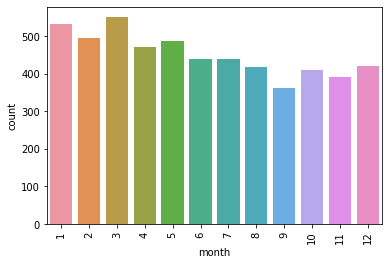



Statistical analysis of quarter:
1    1577
2    1395
4    1224
3    1220
Name: quarter, dtype: int64


Descriptive statistics of quarter:
count     5416
unique       4
top          1
freq      1577
Name: quarter, dtype: int64


Histogram of quarter:


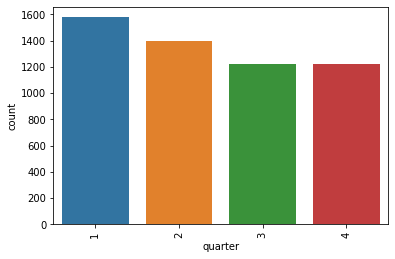

In [29]:
#statistical analysis of categorical features
for feature in categorical_features:
    print('\n')
    print('Statistical analysis of {}:'.format(feature))
    print(df[feature].value_counts())
    print('\n')
    print('Descriptive statistics of {}:'.format(feature))
    print(df[feature].describe())
    print('\n')
    print('Histogram of {}:'.format(feature))
    sns.countplot(x=feature, data=df)
    plt.xticks(rotation=90)
    plt.show()

In [30]:
def show_density(var_data):
    fig = plt.figure(figsize=(10,4))

    # Plot density
    var_data.plot.density()

    # Add titles and labels
    plt.title(var_data.name + ' Data Density')

    # Show the mean, median, and mode
    plt.axvline(x=var_data.mean(), color = 'cyan', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.median(), color = 'red', linestyle='dashed', linewidth = 2)
    plt.axvline(x=var_data.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2)

    # Show the figure
    plt.show()

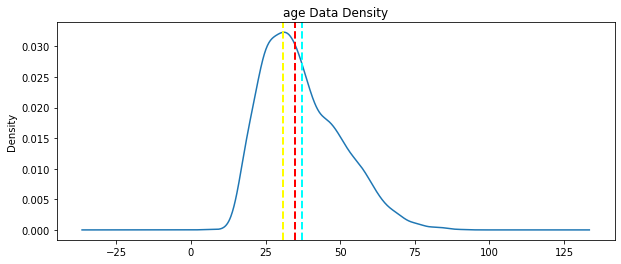

In [31]:

# Get the density of numeric features
for col in numeric_features:
    show_density(df[col])

In [32]:
def show_distribution(var_data):
    '''
    This function will make a distribution (graph) and display it
    '''

    # Get statistics
    min_val = var_data.min()
    max_val = var_data.max()
    mean_val = var_data.mean()
    med_val = var_data.median()
    mod_val = var_data.mode()[0]

    print(var_data.name +'\n'+'Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (10,4))

    # Plot the histogram
    ax[0].hist(var_data)
    ax[0].set_ylabel('Frequency')

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2)
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2)

    # Plot the boxplot
    ax[1].boxplot(var_data, vert=False)
    ax[1].set_xlabel('Value')

    # Add a title to the Figure
    fig.suptitle('Distribution of ' + var_data.name)

    # Show the figure
    fig.show()


age
Minimum:6.00
Mean:37.12
Median:35.00
Mode:31.00
Maximum:91.00



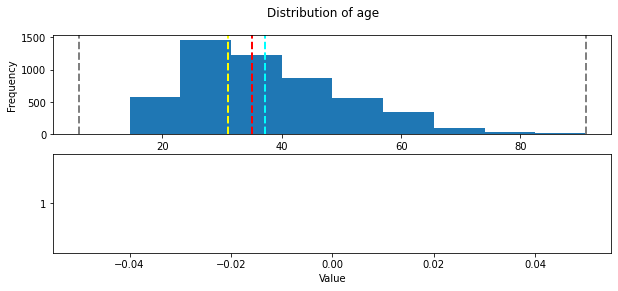

In [33]:
for col in numeric_features:
    show_distribution(df[col])

In [34]:
#bivariate data exploration
def plot_bivariate (arr_1, arr_2, df, kind):
    '''
    This function will plot a bivariate graph and display it
    arr_1: first array
    arr_2: second array
    df: dataframe
    kind: kind of plot
    '''
    for col_1 in arr_1:
        for col_2 in arr_2:
            plt.figure(figsize=(20,5))
            sns.catplot(x=col_1, y=col_2, data=df, kind=kind)
            plt.xticks(rotation=90)
            plt.show();


<Figure size 1440x360 with 0 Axes>

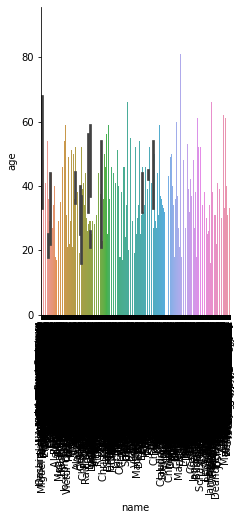

<Figure size 1440x360 with 0 Axes>

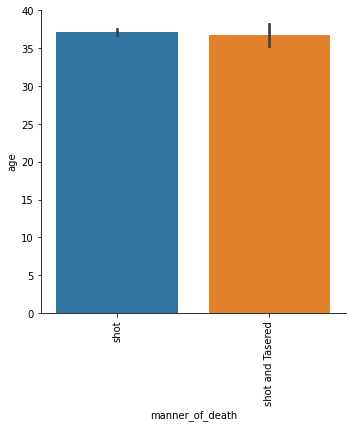

<Figure size 1440x360 with 0 Axes>

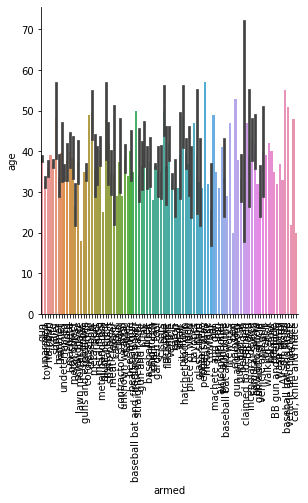

<Figure size 1440x360 with 0 Axes>

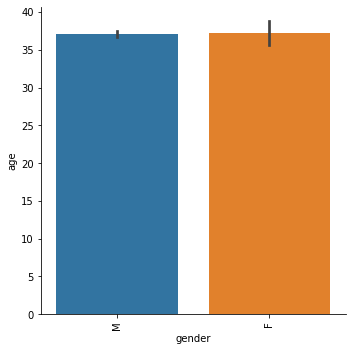

<Figure size 1440x360 with 0 Axes>

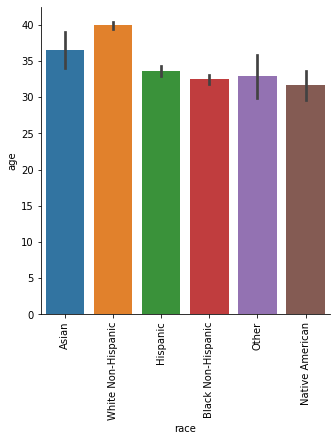

<Figure size 1440x360 with 0 Axes>

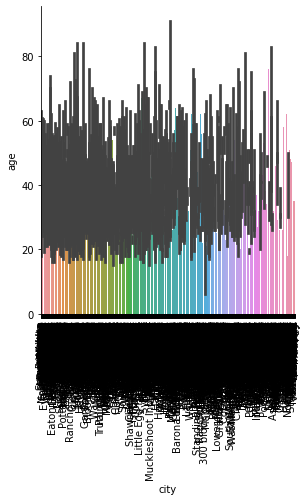

<Figure size 1440x360 with 0 Axes>

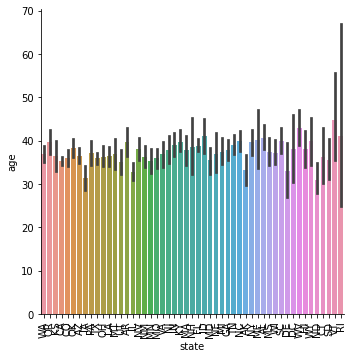

<Figure size 1440x360 with 0 Axes>

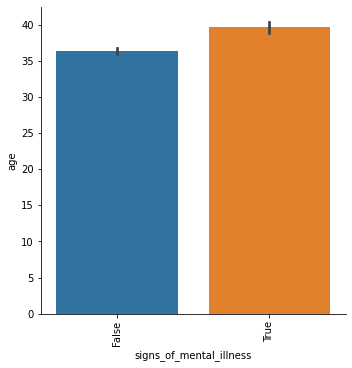

<Figure size 1440x360 with 0 Axes>

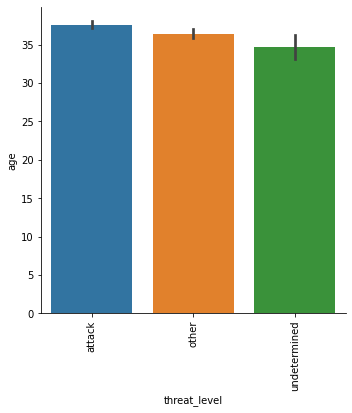

<Figure size 1440x360 with 0 Axes>

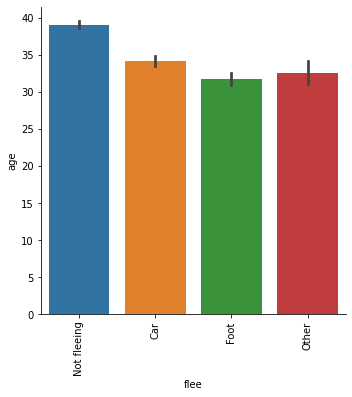

<Figure size 1440x360 with 0 Axes>

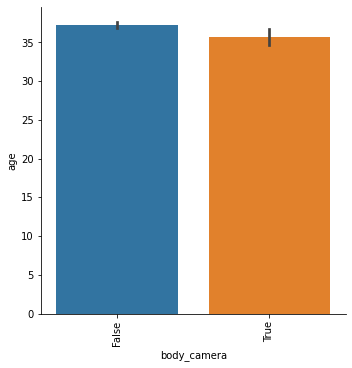

<Figure size 1440x360 with 0 Axes>

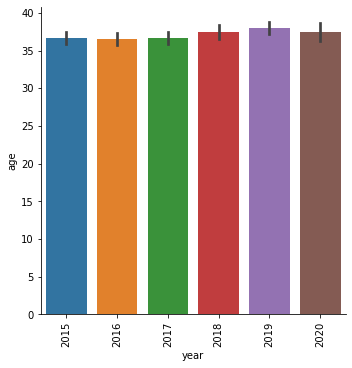

<Figure size 1440x360 with 0 Axes>

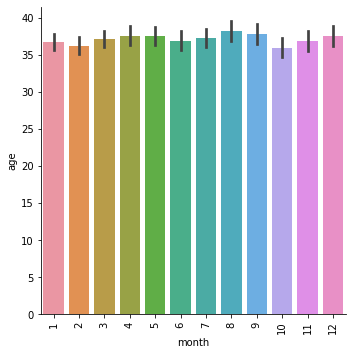

<Figure size 1440x360 with 0 Axes>

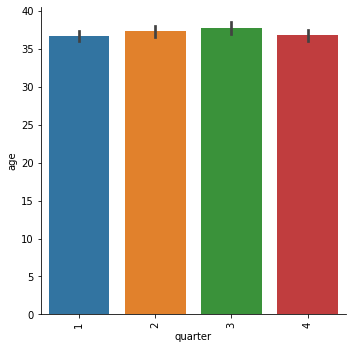

In [35]:
plot_bivariate (categorical_features, numeric_features, df, 'bar')

In [36]:
df.year.unique()

[2015, 2016, 2017, 2018, 2019, 2020]
Categories (6, int64): [2015, 2016, 2017, 2018, 2019, 2020]

In [37]:
#extracting year_df from df
def year_df(df, year):
    return df[df['year'] == year]
    
#extracting month_df from df

def month_df(df, month):
    return df[df['month'] == month]

In [38]:
#creating a daframe for each year
year_dfs = []
for year in df.year.unique().tolist():
    globals() [f"df_{year}"] = year_df(df, year)
    year_dfs.append([f"df_{year}"])
    
    #create folder if it doesn't exist
    if not os.path.exists(f"data/processed/"):
        os.makedirs(f"data/processed/")
        
    #save each dataframe as a csv file
    globals()[f"df_{year}"].to_csv(f"data/processed/{year}.csv")
    print(f"df_{year} created and saved as {year}.csv")
print(year_dfs)

df_2015 created and saved as 2015.csv
df_2016 created and saved as 2016.csv
df_2017 created and saved as 2017.csv
df_2018 created and saved as 2018.csv
df_2019 created and saved as 2019.csv
df_2020 created and saved as 2020.csv
[['df_2015'], ['df_2016'], ['df_2017'], ['df_2018'], ['df_2019'], ['df_2020']]


In [39]:
df_2015.head()

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,year,month,quarter
0,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,2015,1,1
1,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White Non-Hispanic,Aloha,OR,False,attack,Not fleeing,False,2015,1,1
2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,2015,1,1
3,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White Non-Hispanic,San Francisco,CA,True,attack,Not fleeing,False,2015,1,1
4,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,2015,1,1


In [40]:
#reading csv files in processed folder
path = './data/processed/'
year_dfs = {}
for file in os.listdir(path):
    if file.endswith('.csv'):
        print(file)
        globals() [f"df_{file}"] = pd.read_csv(path+file)
        year_dfs[f"df_{file}"] = globals() [f"df_{file}"]
        print("df_"+file+" created")
        temp = pd.read_csv(path+file)
        df_info(temp)
        

2019.csv
df_2019.csv created
Dataframe info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               1002 non-null   int64  
 1   name                     1002 non-null   object 
 2   date                     1002 non-null   object 
 3   manner_of_death          1002 non-null   object 
 4   armed                    1002 non-null   object 
 5   age                      933 non-null    float64
 6   gender                   1002 non-null   object 
 7   race                     858 non-null    object 
 8   city                     1002 non-null   object 
 9   state                    1002 non-null   object 
 10  signs_of_mental_illness  1002 non-null   bool   
 11  threat_level             1002 non-null   object 
 12  flee                     927 non-null    object 
 13  body_camera              1002 non

In [41]:
list(year_dfs)

['df_2019.csv',
 'df_2016.csv',
 'df_2015.csv',
 'df_2020.csv',
 'df_2017.csv',
 'df_2018.csv']

numeric density of 2019.csv:


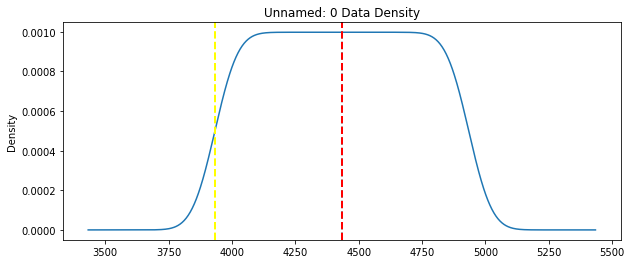

numeric density of 2019.csv:


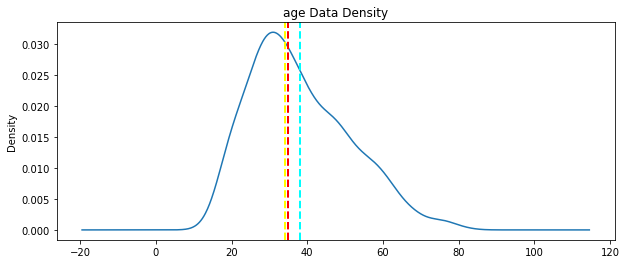

numeric density of 2019.csv:


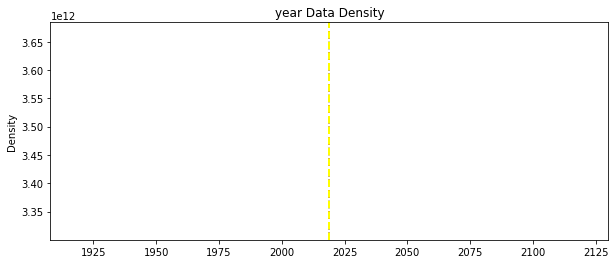

numeric density of 2019.csv:


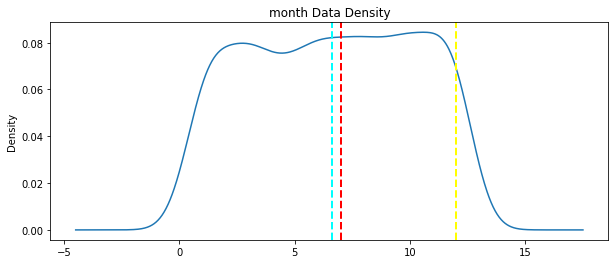

numeric density of 2019.csv:


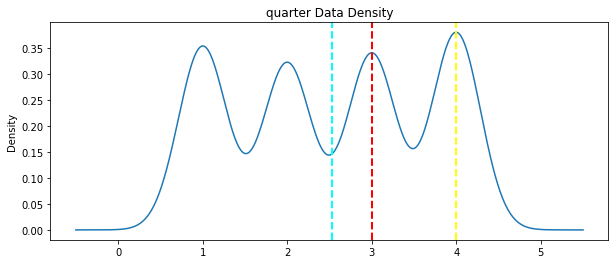

numeric density of 2016.csv:


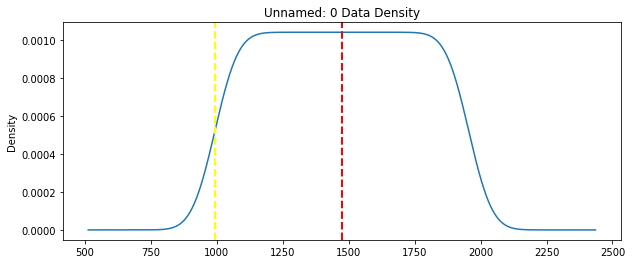

numeric density of 2016.csv:


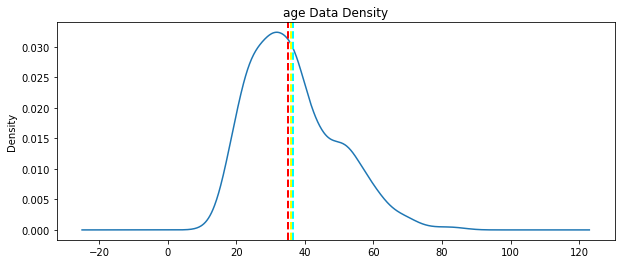

numeric density of 2016.csv:


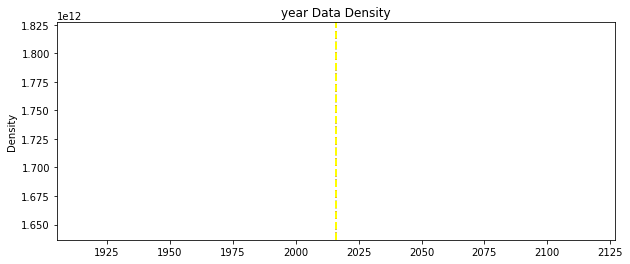

numeric density of 2016.csv:


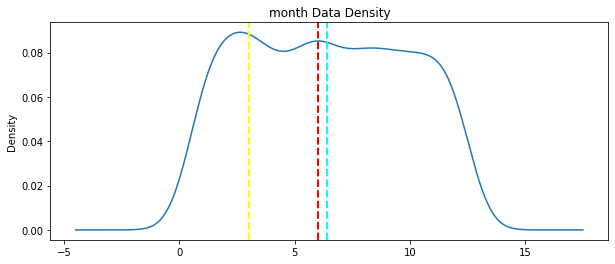

numeric density of 2016.csv:


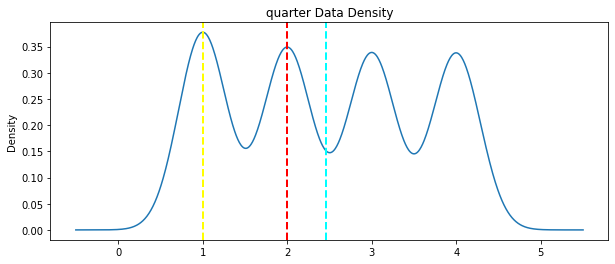

numeric density of 2015.csv:


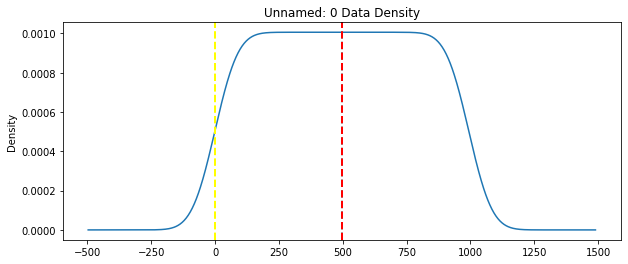

numeric density of 2015.csv:


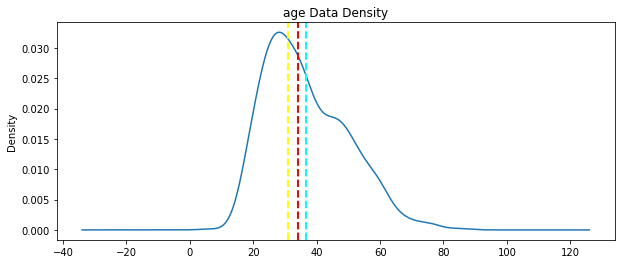

numeric density of 2015.csv:


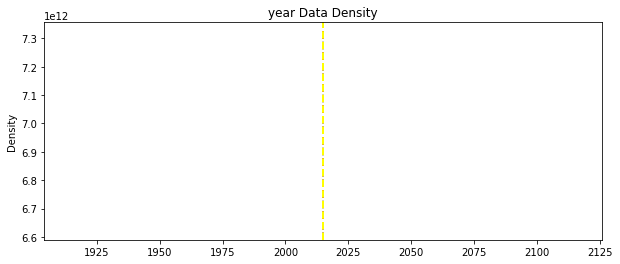

numeric density of 2015.csv:


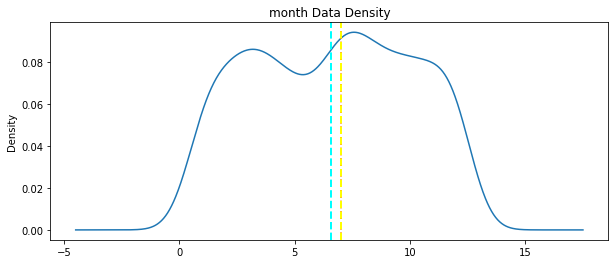

numeric density of 2015.csv:


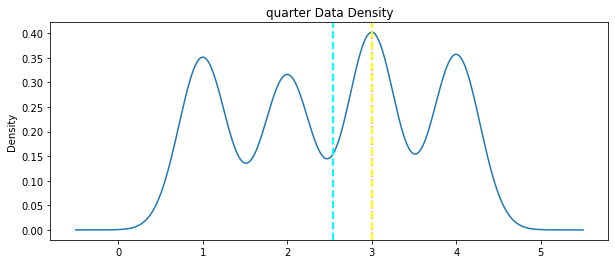

numeric density of 2020.csv:


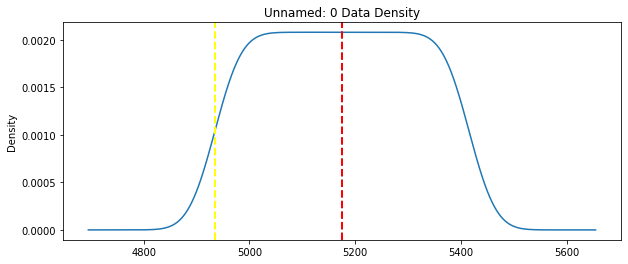

numeric density of 2020.csv:


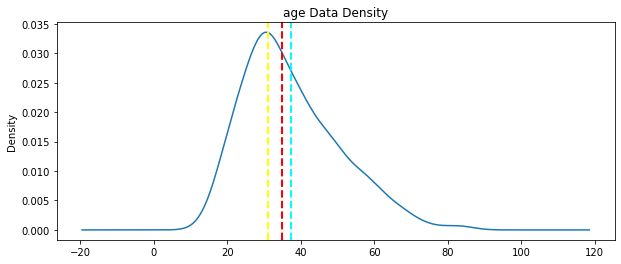

numeric density of 2020.csv:


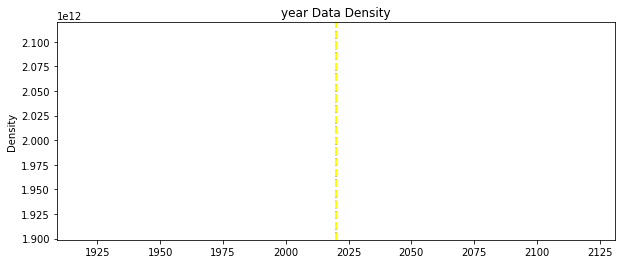

numeric density of 2020.csv:


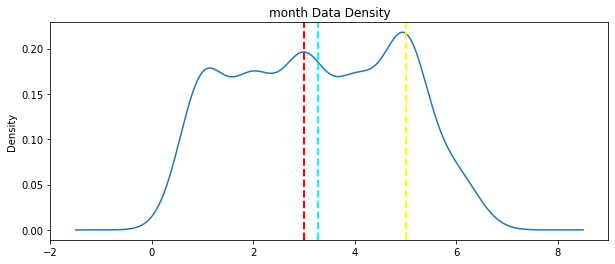

numeric density of 2020.csv:


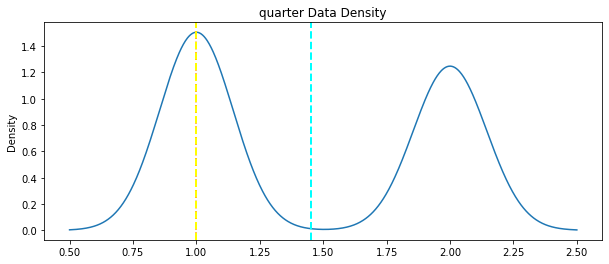

numeric density of 2017.csv:


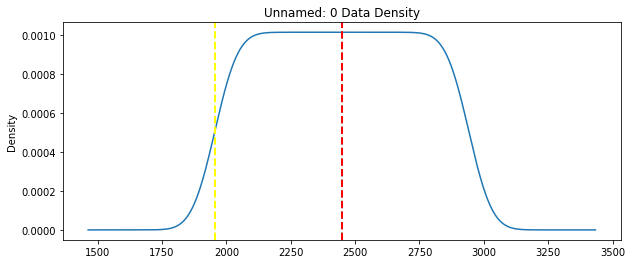

numeric density of 2017.csv:


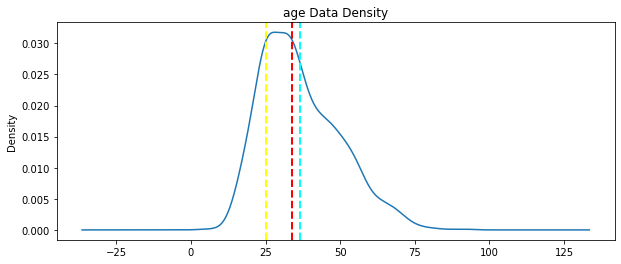

numeric density of 2017.csv:


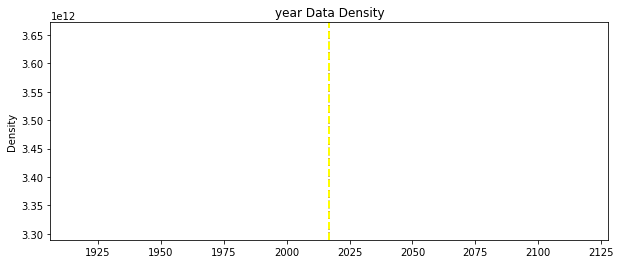

numeric density of 2017.csv:


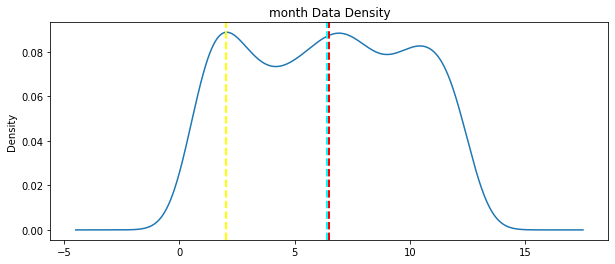

numeric density of 2017.csv:


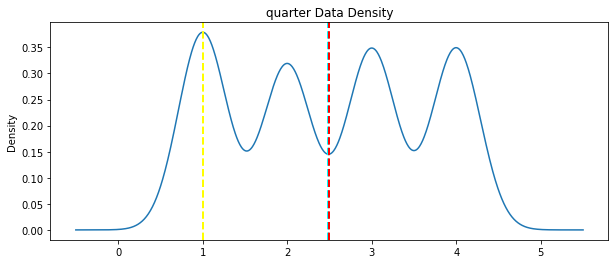

numeric density of 2018.csv:


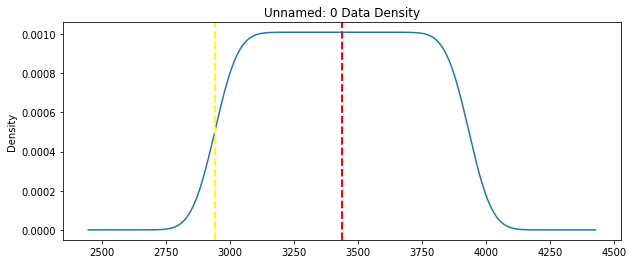

numeric density of 2018.csv:


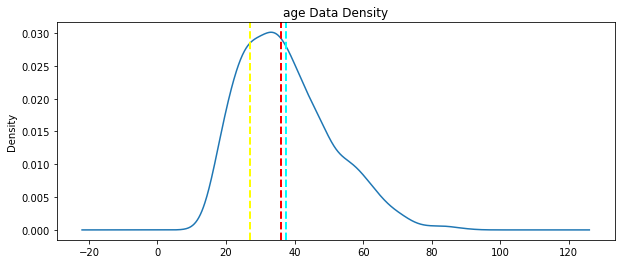

numeric density of 2018.csv:


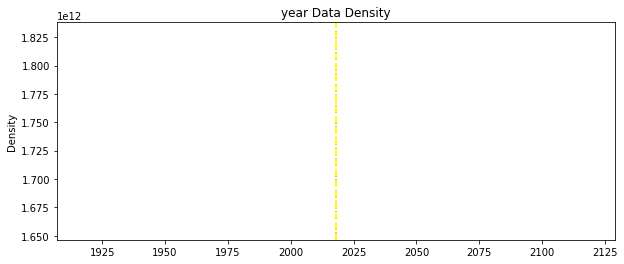

numeric density of 2018.csv:


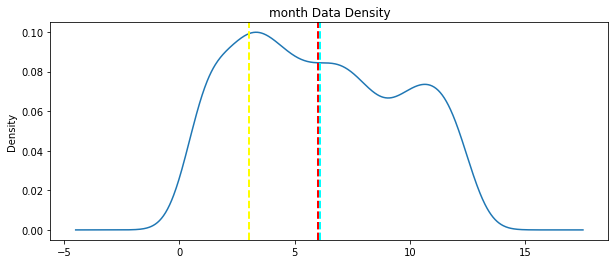

numeric density of 2018.csv:


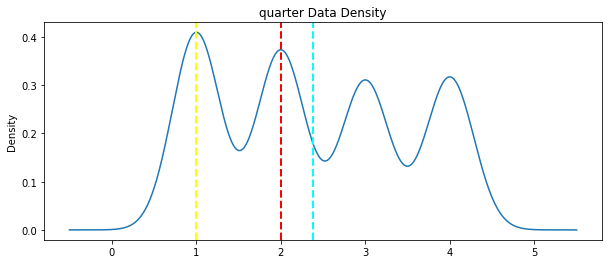

In [42]:
for file in os.listdir(path):
    if file.endswith('.csv'):
        temp = pd.read_csv(path+file)
        categorical_features = temp.select_dtypes(include=['object', 'bool', 'category']).columns
        numeric_features = temp.select_dtypes(include=['int64', 'float64']).columns
        for col in numeric_features:
            print('numeric density of {}:'.format(file))
            show_density(temp[col])


categorical distribution of 2019.csv:


Statistical analysis of name:
TK TK                        54
Benjamin Diaz                 2
Clayton Andrews               2
Robert Anderson               1
Eduard Alexis Lopez-Ucles     1
                             ..
Robert Uhl Johnson            1
Jorge Albert Merino           1
Timothy Russell Majchrzak     1
Ethan Austin Murray           1
Michael Vincent Davis         1
Name: name, Length: 947, dtype: int64


Descriptive statistics of name:
count      1002
unique      947
top       TK TK
freq         54
Name: name, dtype: object


Histogram of name:


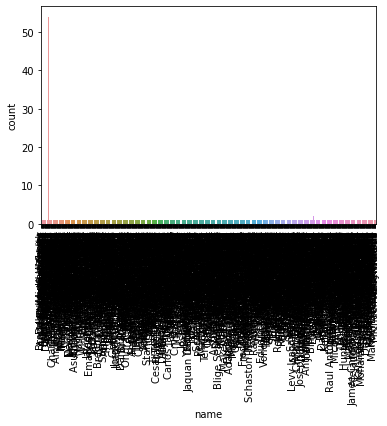



Statistical analysis of date:
2019-01-28    9
2019-12-10    8
2019-06-06    8
2019-03-27    7
2019-12-12    7
             ..
2019-06-14    1
2019-06-23    1
2019-02-05    1
2019-01-22    1
2019-01-18    1
Name: date, Length: 334, dtype: int64


Descriptive statistics of date:
count           1002
unique           334
top       2019-01-28
freq               9
Name: date, dtype: object


Histogram of date:


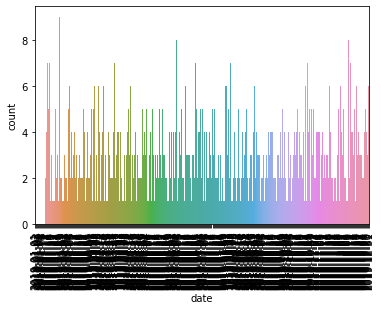



Statistical analysis of manner_of_death:
shot                964
shot and Tasered     38
Name: manner_of_death, dtype: int64


Descriptive statistics of manner_of_death:
count     1002
unique       2
top       shot
freq       964
Name: manner_of_death, dtype: object


Histogram of manner_of_death:


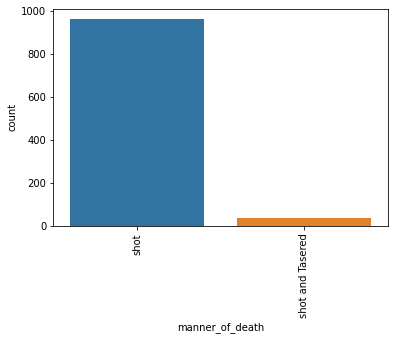



Statistical analysis of armed:
gun                       584
knife                     142
vehicle                    62
unarmed                    55
toy weapon                 26
undetermined               20
unknown weapon             19
gun and vehicle             8
sword                       7
ax                          7
sharp object                7
Taser                       5
baseball bat                5
hammer                      5
machete                     4
hatchet                     3
gun and car                 3
scissors                    3
shovel                      2
box cutter                  2
BB gun                      2
gun and knife               2
crowbar                     2
screwdriver                 2
piece of wood               2
baton                       1
straight edge razor         1
Airsoft pistol              1
ice pick                    1
baseball bat and knife      1
chair                       1
vehicle and gun             1
vehicle

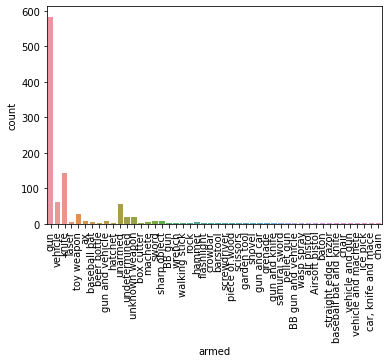



Statistical analysis of gender:
M    959
F     43
Name: gender, dtype: int64


Descriptive statistics of gender:
count     1002
unique       2
top          M
freq       959
Name: gender, dtype: object


Histogram of gender:


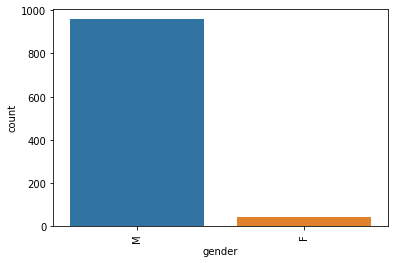



Statistical analysis of race:
White Non-Hispanic    404
Black Non-Hispanic    250
Hispanic              163
Asian                  19
Native American        13
Other                   9
Name: race, dtype: int64


Descriptive statistics of race:
count                    858
unique                     6
top       White Non-Hispanic
freq                     404
Name: race, dtype: object


Histogram of race:


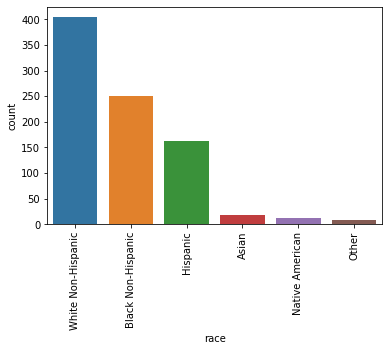



Statistical analysis of city:
Los Angeles    21
Phoenix        13
New York       11
Houston        11
San Antonio    10
               ..
Tunbridge       1
Savannah        1
Montebello      1
Wytheville      1
Cross Lanes     1
Name: city, Length: 675, dtype: int64


Descriptive statistics of city:
count            1002
unique            675
top       Los Angeles
freq               21
Name: city, dtype: object


Histogram of city:


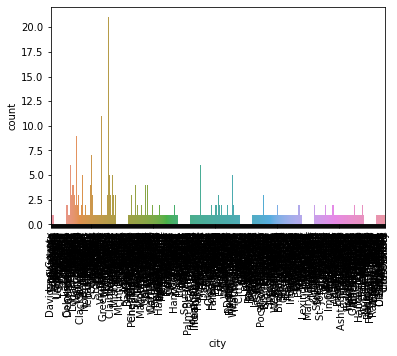



Statistical analysis of state:
CA    135
TX    108
FL     64
GA     37
CO     36
WA     36
AZ     35
OK     35
NC     34
TN     33
MO     28
OH     24
NY     23
AR     21
LA     20
NM     19
MD     19
MS     18
OR     18
SC     18
WI     18
IN     16
KY     15
PA     14
WV     13
MI     13
IL     13
UT     12
NJ     12
NV     11
AL     11
MN     11
VA     10
KS      9
HI      7
AK      7
ID      7
IA      6
MT      6
NE      6
MA      5
CT      4
SD      3
VT      3
ME      3
NH      2
DE      2
DC      1
WY      1
Name: state, dtype: int64


Descriptive statistics of state:
count     1002
unique      49
top         CA
freq       135
Name: state, dtype: object


Histogram of state:


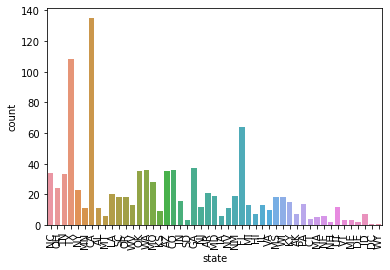



Statistical analysis of signs_of_mental_illness:
False    803
True     199
Name: signs_of_mental_illness, dtype: int64


Descriptive statistics of signs_of_mental_illness:
count      1002
unique        2
top       False
freq        803
Name: signs_of_mental_illness, dtype: object


Histogram of signs_of_mental_illness:


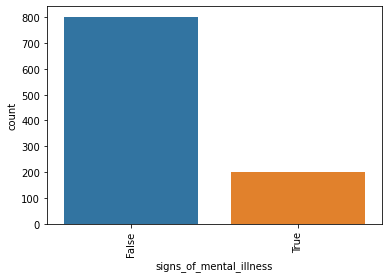



Statistical analysis of threat_level:
attack          692
other           278
undetermined     32
Name: threat_level, dtype: int64


Descriptive statistics of threat_level:
count       1002
unique         3
top       attack
freq         692
Name: threat_level, dtype: object


Histogram of threat_level:


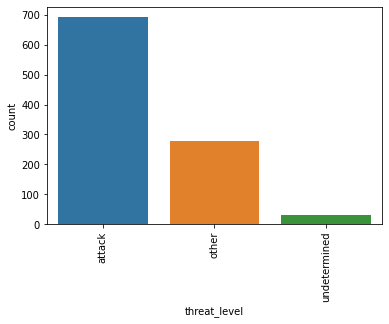



Statistical analysis of flee:
Not fleeing    593
Car            176
Foot           137
Other           21
Name: flee, dtype: int64


Descriptive statistics of flee:
count             927
unique              4
top       Not fleeing
freq              593
Name: flee, dtype: object


Histogram of flee:


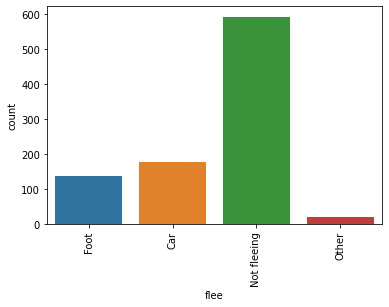



Statistical analysis of body_camera:
False    872
True     130
Name: body_camera, dtype: int64


Descriptive statistics of body_camera:
count      1002
unique        2
top       False
freq        872
Name: body_camera, dtype: object


Histogram of body_camera:


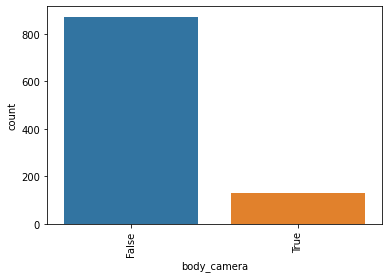

categorical distribution of 2016.csv:


Statistical analysis of name:
TK TK                   9
Michael Johnson         2
Joshua Sisson           1
Paula Dell Phillips     1
Elias Portillo          1
                       ..
Damon Blair             1
David Shane Anderson    1
Kendar del Rosario      1
Lee Easter              1
Chase Anthony Tuseth    1
Name: name, Length: 953, dtype: int64


Descriptive statistics of name:
count       962
unique      953
top       TK TK
freq          9
Name: name, dtype: object


Histogram of name:


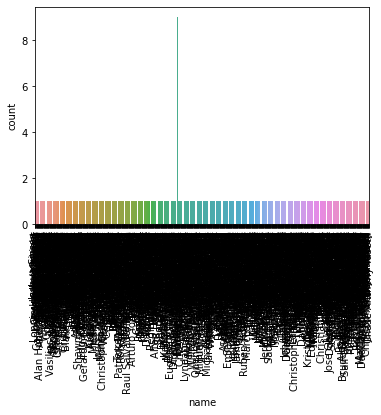



Statistical analysis of date:
2016-01-27    8
2016-12-21    8
2016-08-18    7
2016-03-13    7
2016-05-26    7
             ..
2016-08-23    1
2016-08-22    1
2016-08-21    1
2016-08-20    1
2016-01-01    1
Name: date, Length: 340, dtype: int64


Descriptive statistics of date:
count            962
unique           340
top       2016-01-27
freq               8
Name: date, dtype: object


Histogram of date:


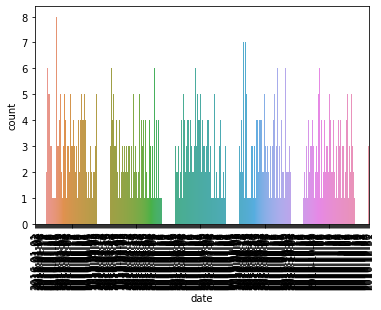



Statistical analysis of manner_of_death:
shot                900
shot and Tasered     62
Name: manner_of_death, dtype: int64


Descriptive statistics of manner_of_death:
count      962
unique       2
top       shot
freq       900
Name: manner_of_death, dtype: object


Histogram of manner_of_death:


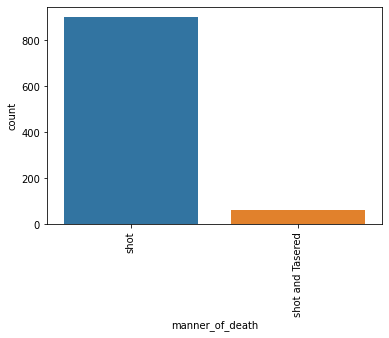



Statistical analysis of armed:
gun                516
knife              152
undetermined        57
unarmed             51
toy weapon          44
unknown weapon       7
machete              7
baseball bat         6
ax                   5
Taser                3
vehicle              3
hammer               3
scissors             3
hatchet              3
rock                 2
crossbow             2
sword                2
baton                2
gun and knife        2
chain saw            2
shovel               1
pipe                 1
machete and gun      1
oar                  1
crowbar              1
blunt object         1
metal pipe           1
metal rake           1
pepper spray         1
brick                1
motorcycle           1
hand torch           1
glass shard          1
piece of wood        1
bayonet              1
flashlight           1
metal pole           1
garden tool          1
hatchet and gun      1
screwdriver          1
pitchfork            1
chair                1
s

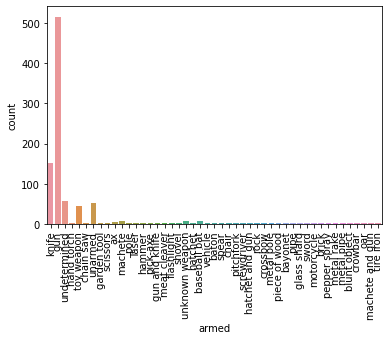



Statistical analysis of gender:
M    922
F     40
Name: gender, dtype: int64


Descriptive statistics of gender:
count     962
unique      2
top         M
freq      922
Name: gender, dtype: object


Histogram of gender:


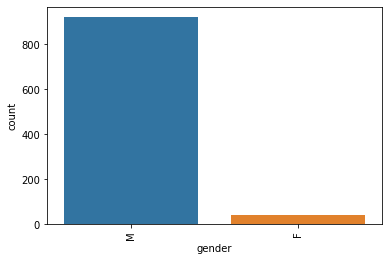



Statistical analysis of race:
White Non-Hispanic    468
Black Non-Hispanic    234
Hispanic              160
Native American        16
Asian                  15
Other                  11
Name: race, dtype: int64


Descriptive statistics of race:
count                    904
unique                     6
top       White Non-Hispanic
freq                     468
Name: race, dtype: object


Histogram of race:


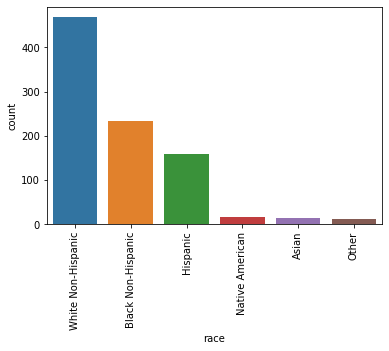



Statistical analysis of city:
Phoenix        15
Los Angeles    14
Houston        11
Chicago        11
San Antonio     9
               ..
Spokane         1
Milcreek        1
Kingsbury       1
Chesapeake      1
Mankato         1
Name: city, Length: 665, dtype: int64


Descriptive statistics of city:
count         962
unique        665
top       Phoenix
freq           15
Name: city, dtype: object


Histogram of city:


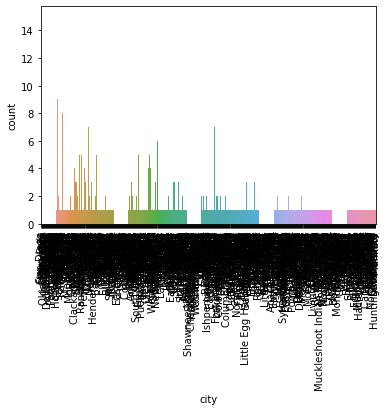



Statistical analysis of state:
CA    138
TX     82
FL     60
AZ     50
NC     33
CO     31
OK     26
IL     26
WA     26
GA     26
OH     26
AL     25
PA     22
TN     22
NM     21
MO     21
LA     19
KY     18
WI     17
NY     17
SC     17
VA     17
MD     15
AR     15
OR     15
NV     14
MN     14
IN     14
MI     12
NJ     12
MA     12
WV     12
KS     10
MS      8
UT      8
NE      7
AK      7
HI      6
ID      6
DC      5
IA      5
MT      5
CT      4
SD      4
VT      2
RI      2
ME      2
NH      2
WY      2
ND      1
DE      1
Name: state, dtype: int64


Descriptive statistics of state:
count     962
unique     51
top        CA
freq      138
Name: state, dtype: object


Histogram of state:


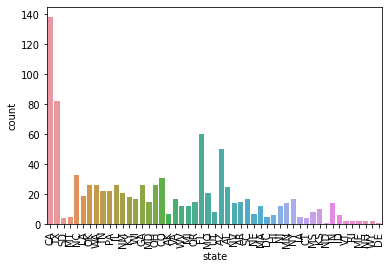



Statistical analysis of signs_of_mental_illness:
False    718
True     244
Name: signs_of_mental_illness, dtype: int64


Descriptive statistics of signs_of_mental_illness:
count       962
unique        2
top       False
freq        718
Name: signs_of_mental_illness, dtype: object


Histogram of signs_of_mental_illness:


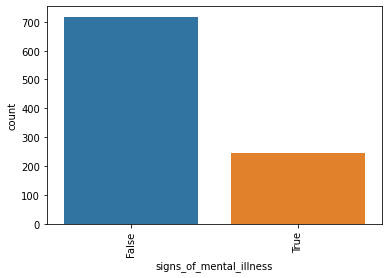



Statistical analysis of threat_level:
attack          542
other           363
undetermined     57
Name: threat_level, dtype: int64


Descriptive statistics of threat_level:
count        962
unique         3
top       attack
freq         542
Name: threat_level, dtype: object


Histogram of threat_level:


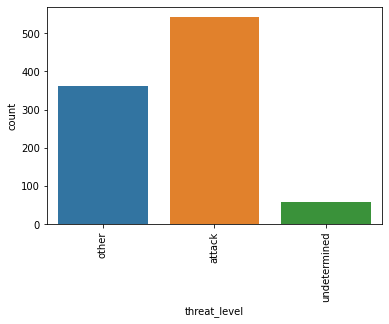



Statistical analysis of flee:
Not fleeing    630
Car            143
Foot           121
Other           51
Name: flee, dtype: int64


Descriptive statistics of flee:
count             945
unique              4
top       Not fleeing
freq              630
Name: flee, dtype: object


Histogram of flee:


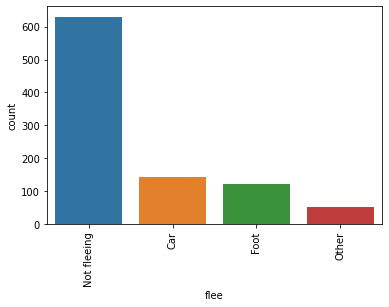



Statistical analysis of body_camera:
False    817
True     145
Name: body_camera, dtype: int64


Descriptive statistics of body_camera:
count       962
unique        2
top       False
freq        817
Name: body_camera, dtype: object


Histogram of body_camera:


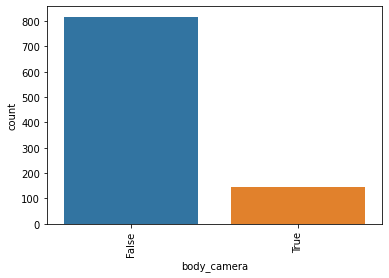

categorical distribution of 2015.csv:


Statistical analysis of name:
Tim Elliot               1
Freddy Centeno           1
William Evans            1
Felix Kumi               1
Devin Brian Dial         1
                        ..
Brendon Glenn            1
Thong Kien Ma            1
Robert A. Frost          1
David William Johnson    1
Keith Childress          1
Name: name, Length: 994, dtype: int64


Descriptive statistics of name:
count            994
unique           994
top       Tim Elliot
freq               1
Name: name, dtype: object


Histogram of name:


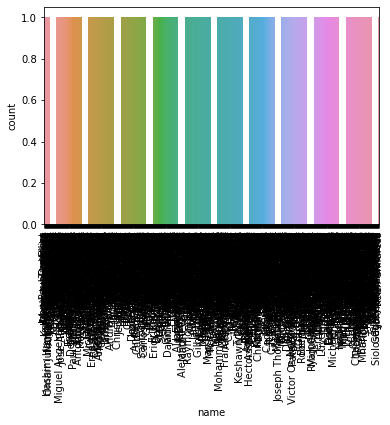



Statistical analysis of date:
2015-07-07    8
2015-12-14    8
2015-03-27    7
2015-02-28    7
2015-07-16    7
             ..
2015-05-16    1
2015-05-22    1
2015-10-07    1
2015-10-06    1
2015-12-31    1
Name: date, Length: 341, dtype: int64


Descriptive statistics of date:
count            994
unique           341
top       2015-07-07
freq               8
Name: date, dtype: object


Histogram of date:


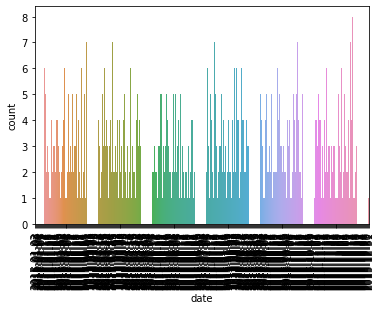



Statistical analysis of manner_of_death:
shot                926
shot and Tasered     68
Name: manner_of_death, dtype: int64


Descriptive statistics of manner_of_death:
count      994
unique       2
top       shot
freq       926
Name: manner_of_death, dtype: object


Histogram of manner_of_death:


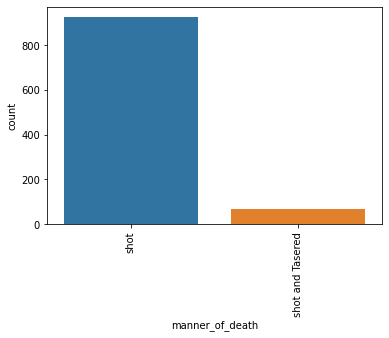



Statistical analysis of armed:
gun                                 563
knife                               138
unarmed                              94
toy weapon                           43
undetermined                         27
machete                               8
box cutter                            7
unknown weapon                        6
sword                                 6
metal pipe                            4
hammer                                4
guns and explosives                   3
Taser                                 3
screwdriver                           2
crossbow                              2
hatchet                               2
blunt object                          2
metal stick                           2
contractor's level                    1
brick                                 1
ax                                    1
gun and knife                         1
straight edge razor                   1
baseball bat and fireplace poker      1
bean-ba

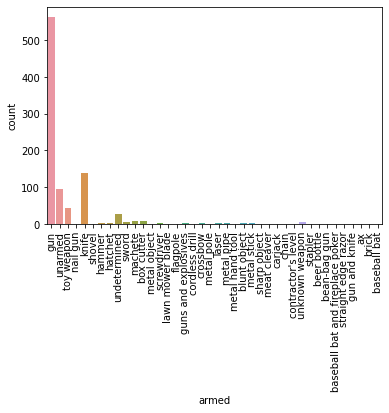



Statistical analysis of gender:
M    952
F     42
Name: gender, dtype: int64


Descriptive statistics of gender:
count     994
unique      2
top         M
freq      952
Name: gender, dtype: object


Histogram of gender:


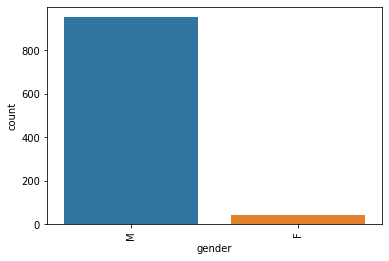



Statistical analysis of race:
White Non-Hispanic    497
Black Non-Hispanic    258
Hispanic              172
Other                  15
Asian                  14
Native American         9
Name: race, dtype: int64


Descriptive statistics of race:
count                    965
unique                     6
top       White Non-Hispanic
freq                     497
Name: race, dtype: object


Histogram of race:


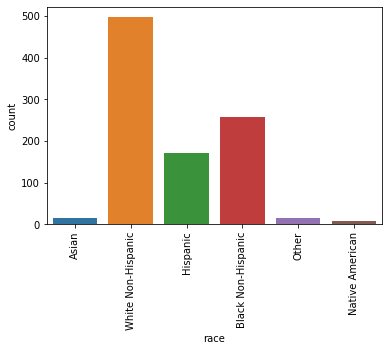



Statistical analysis of city:
Los Angeles      15
Houston          13
Las Vegas        11
Miami            10
Chicago           9
                 ..
Pulaski           1
Lawrenceville     1
Beacon            1
Cerritos          1
Rawlins           1
Name: city, Length: 696, dtype: int64


Descriptive statistics of city:
count             994
unique            696
top       Los Angeles
freq               15
Name: city, dtype: object


Histogram of city:


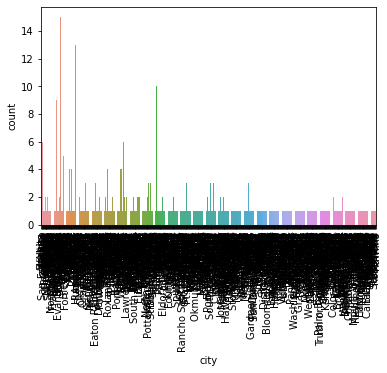



Statistical analysis of state:
CA    190
TX    100
FL     61
AZ     42
OK     32
CO     29
GA     29
OH     29
LA     27
NC     22
IL     21
MO     21
NM     20
TN     20
NV     19
NY     19
IN     19
SC     19
PA     18
VA     18
AL     17
KY     16
WA     16
MI     16
MD     15
NJ     15
OR     15
MN     12
WI     11
WV     10
UT     10
MA      9
KS      9
NE      8
MS      8
ID      7
WY      6
AR      5
IA      5
AK      4
MT      4
DC      4
SD      3
NH      3
DE      3
HI      2
CT      2
ME      2
ND      1
VT      1
Name: state, dtype: int64


Descriptive statistics of state:
count     994
unique     50
top        CA
freq      190
Name: state, dtype: object


Histogram of state:


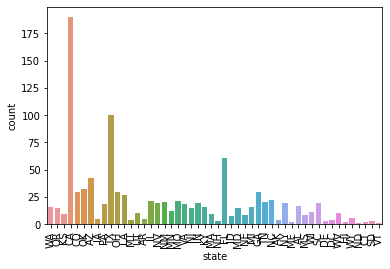



Statistical analysis of signs_of_mental_illness:
False    737
True     257
Name: signs_of_mental_illness, dtype: int64


Descriptive statistics of signs_of_mental_illness:
count       994
unique        2
top       False
freq        737
Name: signs_of_mental_illness, dtype: object


Histogram of signs_of_mental_illness:


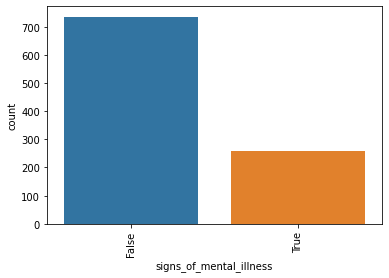



Statistical analysis of threat_level:
attack          732
other           218
undetermined     44
Name: threat_level, dtype: int64


Descriptive statistics of threat_level:
count        994
unique         3
top       attack
freq         732
Name: threat_level, dtype: object


Histogram of threat_level:


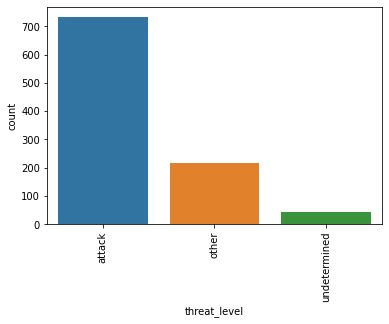



Statistical analysis of flee:
Not fleeing    715
Car            143
Foot           108
Other           19
Name: flee, dtype: int64


Descriptive statistics of flee:
count             985
unique              4
top       Not fleeing
freq              715
Name: flee, dtype: object


Histogram of flee:


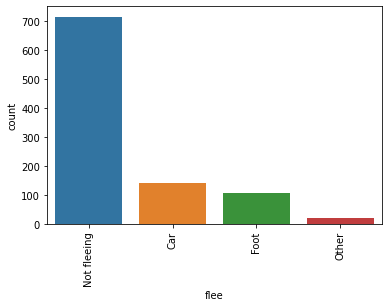



Statistical analysis of body_camera:
False    919
True      75
Name: body_camera, dtype: int64


Descriptive statistics of body_camera:
count       994
unique        2
top       False
freq        919
Name: body_camera, dtype: object


Histogram of body_camera:


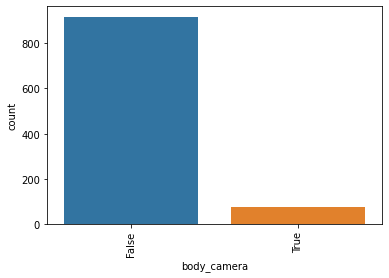

categorical distribution of 2020.csv:


Statistical analysis of name:
TK TK                       31
Miguel Mercado Segura        2
William Patrick Floyd        2
Timothy Leroy Harrington     2
David Tylek Atkinson         2
                            ..
Neal Stuart Nevada           1
Matthew Felix                1
SanJuan Migayle Thomas       1
Kenneth Sashington           1
Nicholas Hirsh               1
Name: name, Length: 446, dtype: int64


Descriptive statistics of name:
count       481
unique      446
top       TK TK
freq         31
Name: name, dtype: object


Histogram of name:


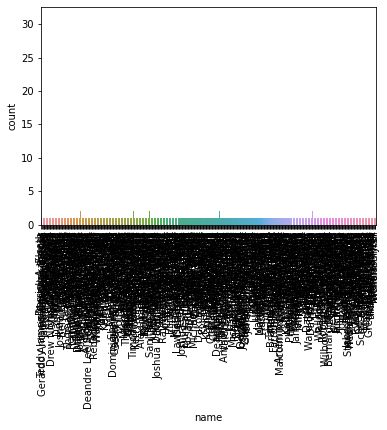



Statistical analysis of date:
2020-05-26    9
2020-02-25    8
2020-05-03    8
2020-05-09    7
2020-05-27    7
             ..
2020-05-12    1
2020-01-17    1
2020-01-14    1
2020-03-22    1
2020-02-22    1
Name: date, Length: 157, dtype: int64


Descriptive statistics of date:
count            481
unique           157
top       2020-05-26
freq               9
Name: date, dtype: object


Histogram of date:


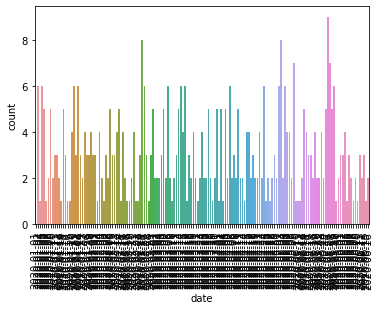



Statistical analysis of manner_of_death:
shot                461
shot and Tasered     20
Name: manner_of_death, dtype: int64


Descriptive statistics of manner_of_death:
count      481
unique       2
top       shot
freq       461
Name: manner_of_death, dtype: object


Histogram of manner_of_death:


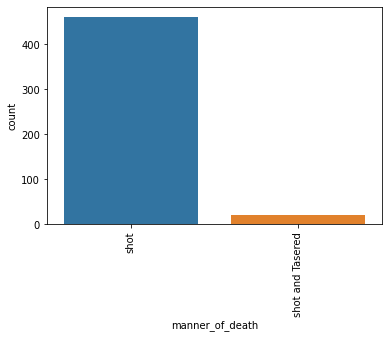



Statistical analysis of armed:
gun                282
knife               67
vehicle             25
unarmed             25
undetermined        22
toy weapon          13
unknown weapon       7
Taser                5
machete              4
sharp object         4
hammer               3
gun and car          3
sword                2
screwdriver          2
meat cleaver         2
vehicle and gun      2
metal pipe           2
rock                 1
samurai sword        1
baseball bat         1
crowbar              1
BB gun               1
gun and vehicle      1
shovel               1
pick-axe             1
scissors             1
chair                1
pellet gun           1
Name: armed, dtype: int64


Descriptive statistics of armed:
count     481
unique     28
top       gun
freq      282
Name: armed, dtype: object


Histogram of armed:


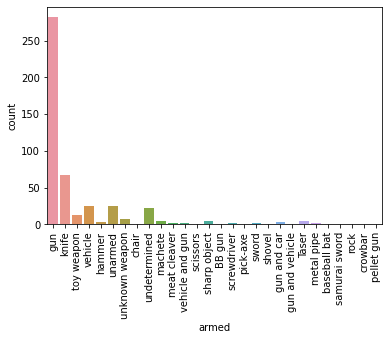



Statistical analysis of gender:
M    464
F     16
Name: gender, dtype: int64


Descriptive statistics of gender:
count     480
unique      2
top         M
freq      464
Name: gender, dtype: object


Histogram of gender:


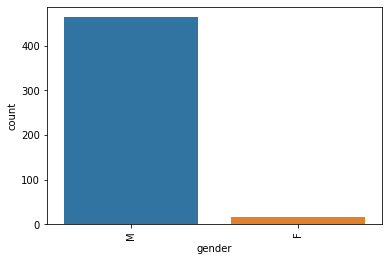



Statistical analysis of race:
White Non-Hispanic    194
Black Non-Hispanic    103
Hispanic               63
Asian                   8
Other                   3
Native American         3
Name: race, dtype: int64


Descriptive statistics of race:
count                    374
unique                     6
top       White Non-Hispanic
freq                     194
Name: race, dtype: object


Histogram of race:


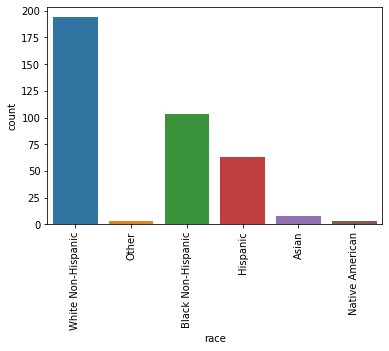



Statistical analysis of city:
Houston          7
Los Angeles      6
Kansas City      6
Jacksonville     6
Phoenix          6
                ..
Santa Ana        1
Santa Clarita    1
Moses Lake       1
Clarkdale        1
Beach Park       1
Name: city, Length: 377, dtype: int64


Descriptive statistics of city:
count         481
unique        377
top       Houston
freq            7
Name: city, dtype: object


Histogram of city:


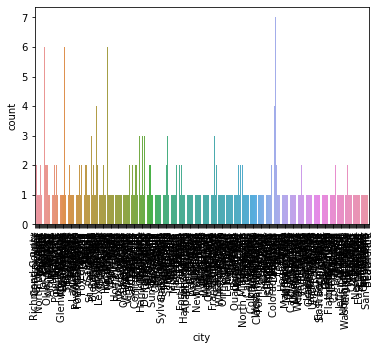



Statistical analysis of state:
CA    61
FL    43
TX    37
CO    24
AZ    21
NC    20
GA    17
MO    16
NV    14
WA    14
AL    13
OK    12
TN    11
OR    11
NY    11
SC    10
OH    10
LA     9
KY     9
MD     9
AR     9
WI     9
IN     9
VA     9
PA     8
AK     6
NJ     5
NM     5
UT     5
IL     4
MS     4
CT     4
MT     4
MA     3
MN     3
ID     3
KS     3
ME     3
MI     2
NE     2
ND     2
IA     2
DE     1
HI     1
WV     1
NH     1
SD     1
Name: state, dtype: int64


Descriptive statistics of state:
count     481
unique     47
top        CA
freq       61
Name: state, dtype: object


Histogram of state:


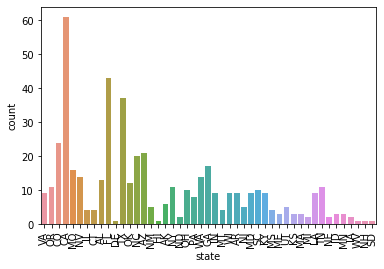



Statistical analysis of signs_of_mental_illness:
False    418
True      63
Name: signs_of_mental_illness, dtype: int64


Descriptive statistics of signs_of_mental_illness:
count       481
unique        2
top       False
freq        418
Name: signs_of_mental_illness, dtype: object


Histogram of signs_of_mental_illness:


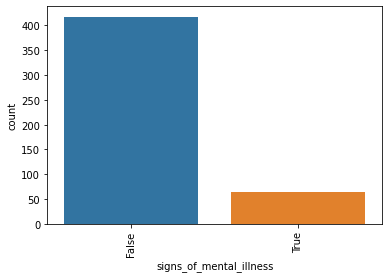



Statistical analysis of threat_level:
attack          317
other           141
undetermined     23
Name: threat_level, dtype: int64


Descriptive statistics of threat_level:
count        481
unique         3
top       attack
freq         317
Name: threat_level, dtype: object


Histogram of threat_level:


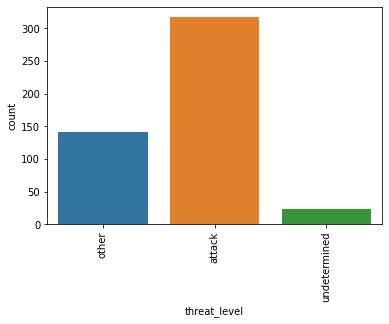



Statistical analysis of flee:
Not fleeing    260
Car             94
Foot            66
Other           16
Name: flee, dtype: int64


Descriptive statistics of flee:
count             436
unique              4
top       Not fleeing
freq              260
Name: flee, dtype: object


Histogram of flee:


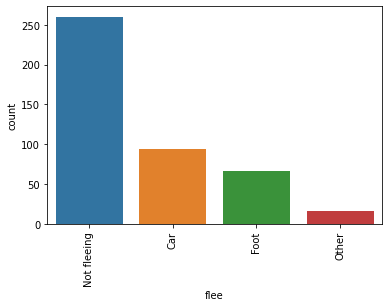



Statistical analysis of body_camera:
False    435
True      46
Name: body_camera, dtype: int64


Descriptive statistics of body_camera:
count       481
unique        2
top       False
freq        435
Name: body_camera, dtype: object


Histogram of body_camera:


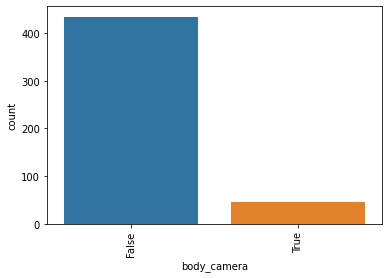

categorical distribution of 2017.csv:


Statistical analysis of name:
TK TK                  33
Henry Rivera Jr.        1
Robert Earl Adams       1
Konstantin Morozov      1
Mark Aaron Jensen       1
                       ..
Jordan Edwards          1
Gene Bernhardt          1
Caleb Jackson           1
Andrew James Lucero     1
Ernie Macias            1
Name: name, Length: 954, dtype: int64


Descriptive statistics of name:
count       986
unique      954
top       TK TK
freq         33
Name: name, dtype: object


Histogram of name:


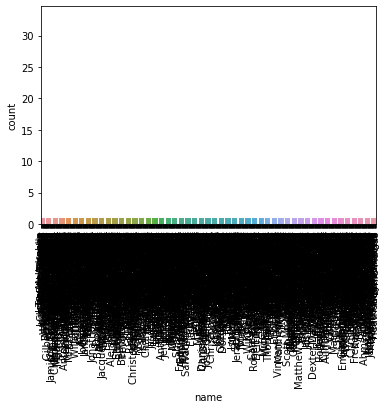



Statistical analysis of date:
2017-02-10    8
2017-12-26    8
2017-01-24    8
2017-07-04    8
2017-02-03    7
             ..
2017-05-22    1
2017-05-25    1
2017-10-18    1
2017-10-17    1
2017-07-02    1
Name: date, Length: 342, dtype: int64


Descriptive statistics of date:
count            986
unique           342
top       2017-02-10
freq               8
Name: date, dtype: object


Histogram of date:


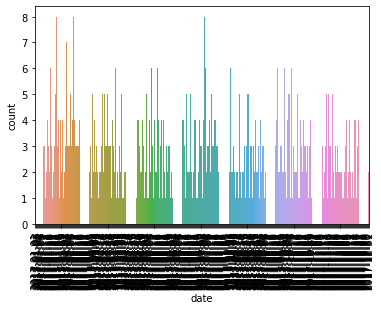



Statistical analysis of manner_of_death:
shot                935
shot and Tasered     51
Name: manner_of_death, dtype: int64


Descriptive statistics of manner_of_death:
count      986
unique       2
top       shot
freq       935
Name: manner_of_death, dtype: object


Histogram of manner_of_death:


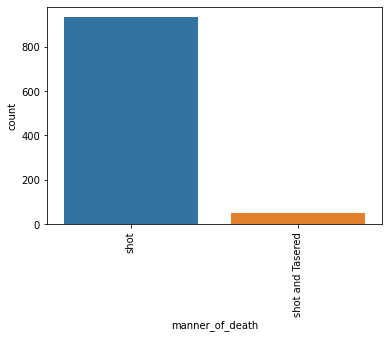



Statistical analysis of armed:
gun                        568
knife                      138
unarmed                     70
toy weapon                  26
undetermined                26
machete                      9
unknown weapon               8
Taser                        6
gun and knife                4
ax                           4
pipe                         4
gun and car                  3
screwdriver                  3
baseball bat                 2
metal object                 2
sword                        2
crossbow                     2
blunt object                 2
hatchet                      2
metal pipe                   2
gun and sword                1
baton                        1
chainsaw                     1
hammer                       1
crowbar                      1
chair                        1
pitchfork                    1
vehicle                      1
baseball bat and bottle      1
pen                          1
fireworks                    1
rock  

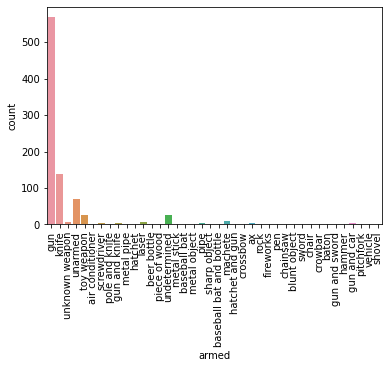



Statistical analysis of gender:
M    940
F     45
Name: gender, dtype: int64


Descriptive statistics of gender:
count     985
unique      2
top         M
freq      940
Name: gender, dtype: object


Histogram of gender:


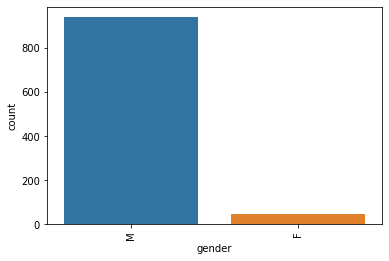



Statistical analysis of race:
White Non-Hispanic    459
Black Non-Hispanic    224
Hispanic              179
Native American        22
Asian                  16
Other                   6
Name: race, dtype: int64


Descriptive statistics of race:
count                    906
unique                     6
top       White Non-Hispanic
freq                     459
Name: race, dtype: object


Histogram of race:


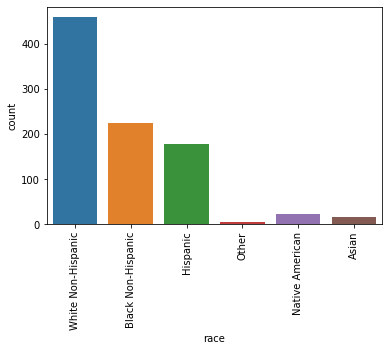



Statistical analysis of city:
Los Angeles       17
Phoenix           12
St. Louis         10
Las Vegas          9
Jacksonville       8
                  ..
Peachtree City     1
Katy               1
Phenix City        1
Buffalo            1
Delano             1
Name: city, Length: 707, dtype: int64


Descriptive statistics of city:
count             986
unique            707
top       Los Angeles
freq               17
Name: city, dtype: object


Histogram of city:


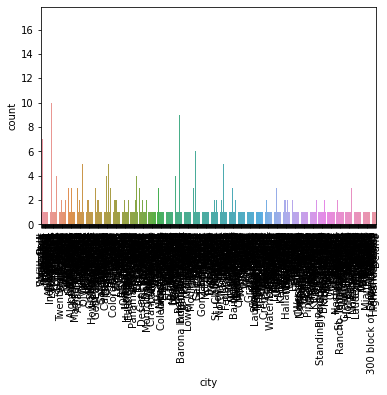



Statistical analysis of state:
CA    161
TX     69
FL     58
AZ     44
WA     38
OH     34
MO     31
CO     31
GA     29
TN     27
OK     26
AL     25
WI     24
PA     23
VA     23
NC     22
NM     21
IL     20
IN     19
LA     19
KY     17
MS     17
NV     16
NY     16
MI     14
KS     12
AR     12
OR     12
SC     12
NJ     12
WV     11
MN      9
MD      9
ME      9
AK      8
UT      7
ID      6
MT      6
CT      6
DE      6
IA      5
MA      3
NH      3
ND      3
SD      3
HI      3
DC      2
VT      1
RI      1
WY      1
Name: state, dtype: int64


Descriptive statistics of state:
count     986
unique     50
top        CA
freq      161
Name: state, dtype: object


Histogram of state:


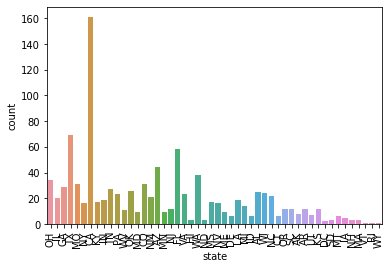



Statistical analysis of signs_of_mental_illness:
False    749
True     237
Name: signs_of_mental_illness, dtype: int64


Descriptive statistics of signs_of_mental_illness:
count       986
unique        2
top       False
freq        749
Name: signs_of_mental_illness, dtype: object


Histogram of signs_of_mental_illness:


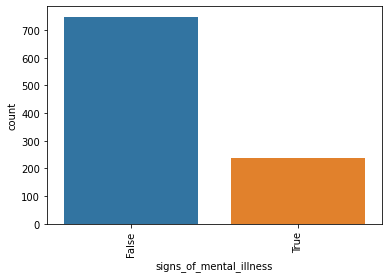



Statistical analysis of threat_level:
attack          597
other           343
undetermined     46
Name: threat_level, dtype: int64


Descriptive statistics of threat_level:
count        986
unique         3
top       attack
freq         597
Name: threat_level, dtype: object


Histogram of threat_level:


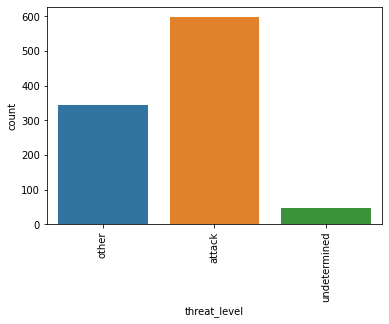



Statistical analysis of flee:
Not fleeing    597
Car            182
Foot           123
Other           33
Name: flee, dtype: int64


Descriptive statistics of flee:
count             935
unique              4
top       Not fleeing
freq              597
Name: flee, dtype: object


Histogram of flee:


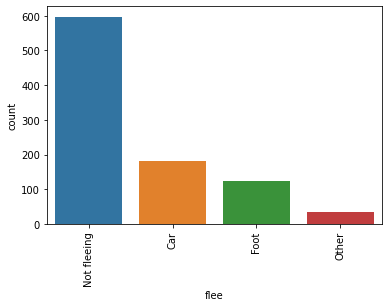



Statistical analysis of body_camera:
False    882
True     104
Name: body_camera, dtype: int64


Descriptive statistics of body_camera:
count       986
unique        2
top       False
freq        882
Name: body_camera, dtype: object


Histogram of body_camera:


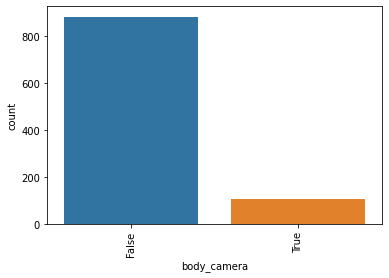

categorical distribution of 2018.csv:


Statistical analysis of name:
TK TK                     59
Roderick McDaniel          2
Johnny Kelley              1
Emmanuel Alquisiras        1
Eric Benjamen Richards     1
                          ..
Grechario Mack             1
Antonino Thomas Gordon     1
Betty Lemoine              1
Kenneth Ross               1
Jesus Ramos                1
Name: name, Length: 932, dtype: int64


Descriptive statistics of name:
count       991
unique      932
top       TK TK
freq         59
Name: name, dtype: object


Histogram of name:


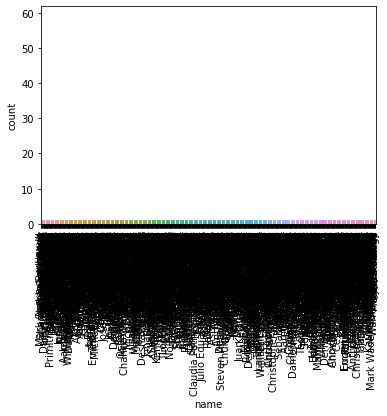



Statistical analysis of date:
2018-06-29    9
2018-01-06    9
2018-02-01    9
2018-04-01    9
2018-03-23    8
             ..
2018-10-16    1
2018-10-15    1
2018-03-17    1
2018-01-30    1
2018-02-04    1
Name: date, Length: 330, dtype: int64


Descriptive statistics of date:
count            991
unique           330
top       2018-06-29
freq               9
Name: date, dtype: object


Histogram of date:


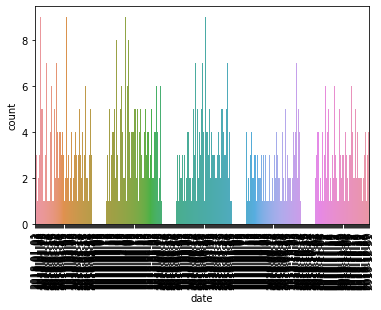



Statistical analysis of manner_of_death:
shot                960
shot and Tasered     31
Name: manner_of_death, dtype: int64


Descriptive statistics of manner_of_death:
count      991
unique       2
top       shot
freq       960
Name: manner_of_death, dtype: object


Histogram of manner_of_death:


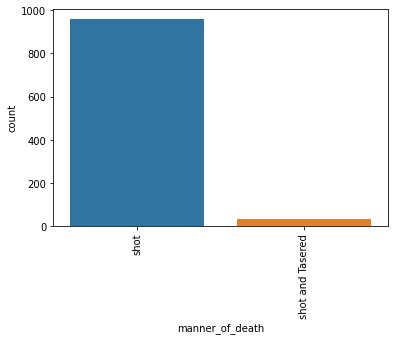



Statistical analysis of armed:
gun                    547
knife                  155
unarmed                 58
vehicle                 48
toy weapon              34
unknown weapon          32
undetermined            12
machete                 11
gun and knife            8
ax                       7
Taser                    4
metal pipe               4
screwdriver              3
box cutter               3
crossbow                 3
baseball bat             3
sword                    3
straight edge razor      2
gun and car              2
glass shard              2
incendiary device        2
BB gun                   2
pick-axe                 2
baton                    1
chain                    1
meat cleaver             1
pole and knife           1
rock                     1
vehicle and gun          1
lawn mower blade         1
gun and vehicle          1
sharp object             1
metal object             1
pellet gun               1
bow and arrow            1
metal pole            

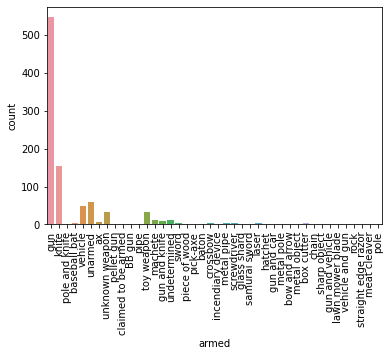



Statistical analysis of gender:
M    939
F     52
Name: gender, dtype: int64


Descriptive statistics of gender:
count     991
unique      2
top         M
freq      939
Name: gender, dtype: object


Histogram of gender:


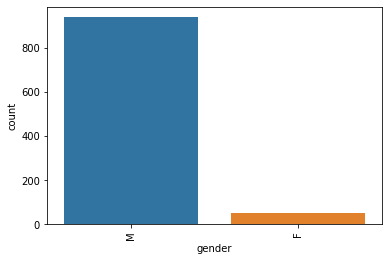



Statistical analysis of race:
White Non-Hispanic    454
Black Non-Hispanic    229
Hispanic              165
Asian                  21
Native American        15
Other                   4
Name: race, dtype: int64


Descriptive statistics of race:
count                    888
unique                     6
top       White Non-Hispanic
freq                     454
Name: race, dtype: object


Histogram of race:


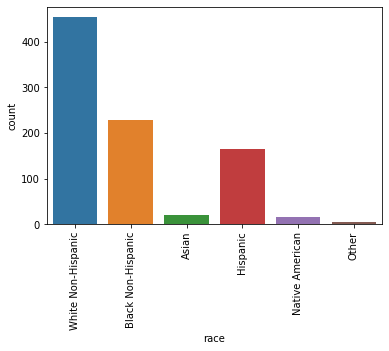



Statistical analysis of city:
Phoenix        24
Los Angeles    12
Columbus       11
Las Vegas      11
Albuquerque     9
               ..
Lodge Grass     1
Magna           1
Austell         1
Tishomingo      1
Longmont        1
Name: city, Length: 685, dtype: int64


Descriptive statistics of city:
count         991
unique        685
top       Phoenix
freq           24
Name: city, dtype: object


Histogram of city:


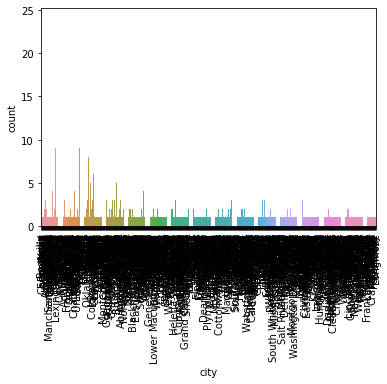



Statistical analysis of state:
CA    114
TX     85
FL     64
AZ     62
GA     44
CO     44
OK     33
OH     32
TN     26
NC     25
MO     24
PA     23
WA     22
NV     22
MI     21
AR     21
NM     20
IL     20
KY     20
UT     18
IN     18
VA     18
OR     17
LA     15
NY     15
ID     13
AL     13
SC     12
WI     12
MN     12
NJ     12
MD     12
HI     11
MS     10
IA      9
WV      7
AK      7
KS      7
MT      6
ND      4
WY      4
MA      3
SD      3
ME      3
VT      2
NH      2
DC      1
NE      1
RI      1
CT      1
Name: state, dtype: int64


Descriptive statistics of state:
count     991
unique     50
top        CA
freq      114
Name: state, dtype: object


Histogram of state:


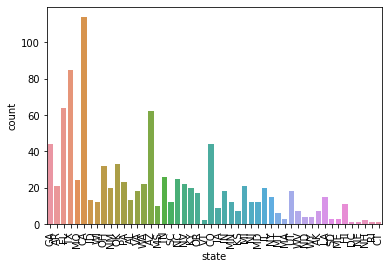



Statistical analysis of signs_of_mental_illness:
False    775
True     216
Name: signs_of_mental_illness, dtype: int64


Descriptive statistics of signs_of_mental_illness:
count       991
unique        2
top       False
freq        775
Name: signs_of_mental_illness, dtype: object


Histogram of signs_of_mental_illness:


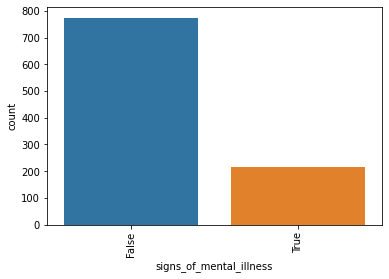



Statistical analysis of threat_level:
attack          615
other           339
undetermined     37
Name: threat_level, dtype: int64


Descriptive statistics of threat_level:
count        991
unique         3
top       attack
freq         615
Name: threat_level, dtype: object


Histogram of threat_level:


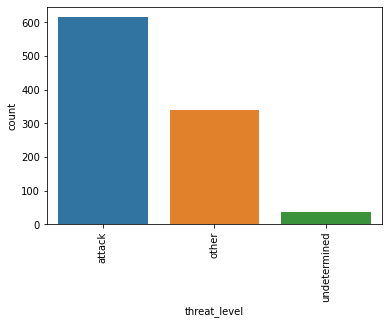



Statistical analysis of flee:
Not fleeing    616
Car            162
Foot           137
Other           24
Name: flee, dtype: int64


Descriptive statistics of flee:
count             939
unique              4
top       Not fleeing
freq              616
Name: flee, dtype: object


Histogram of flee:


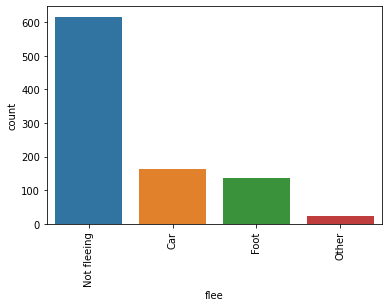



Statistical analysis of body_camera:
False    873
True     118
Name: body_camera, dtype: int64


Descriptive statistics of body_camera:
count       991
unique        2
top       False
freq        873
Name: body_camera, dtype: object


Histogram of body_camera:


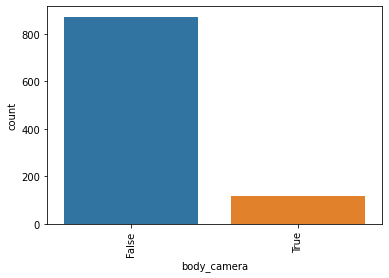

In [43]:
for file in os.listdir(path):
    if file.endswith('.csv'):
        temp = pd.read_csv(path+file)
        categorical_features = temp.select_dtypes(include=['object', 'bool', 'category']).columns
        numeric_features = temp.select_dtypes(include=['int64', 'float64']).columns
        print('categorical distribution of {}:'.format(file))
        for feature in categorical_features:
            print('\n')
            print('Statistical analysis of {}:'.format(feature))
            print(temp[feature].value_counts())
            print('\n')
            print('Descriptive statistics of {}:'.format(feature))
            print(temp[feature].describe())
            print('\n')
            print('Histogram of {}:'.format(feature))
            sns.countplot(x=feature, data=temp)
            plt.xticks(rotation=90)
            plt.show()